In [1]:
# Importing essential libraries

# pandas and numpy for data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn for visuilization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# No warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
datafile_train=r'D:\Machine Learning\Python Projects\Project-2\carvan_train.csv'
datafile_test=r'D:\Machine Learning\Python Projects\Project-2\carvan_test.csv'

car_train=pd.read_csv(datafile_train)
car_test=pd.read_csv(datafile_test)

print('shape of train data: {}'.format(car_train.shape))
print('shape of test data: {}'.format(car_test.shape))

shape of train data: (5822, 86)
shape of test data: (4000, 85)


In [3]:
car_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Missing values

In [4]:
features_with_nan=[fature for feature in car_train.columns if car_train[feature].isnull().sum()>1]
print('Number of Missing Features: {}'.format(len(features_with_nan)))
for feature in features_with_nan:
    print('{}: {}% aMissing values'.format(feature,np.round(car_train[feature].isnull().mean()*100,3)))

Number of Missing Features: 0


* There are no features with missing values.

#### Numerical featues

In [5]:
# Numerical features
numerical_features=[feature for feature in car_train.columns if car_train[feature].dtypes!='O']
print('Number of Numerical Features: {}'.format(len(numerical_features)))

car_train[numerical_features].head()

Number of Numerical Features: 86


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
# discrete features
discrete_features=[feature for feature in car_train.columns if len(car_train[feature].unique())<20]
print('Number of Discrete Features: {}'.format(len(discrete_features)))

car_train[discrete_features].head()

Number of Discrete Features: 85


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


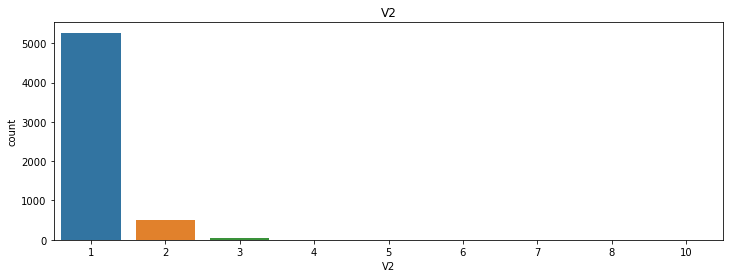

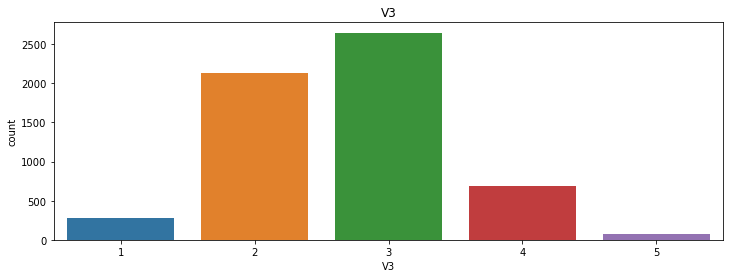

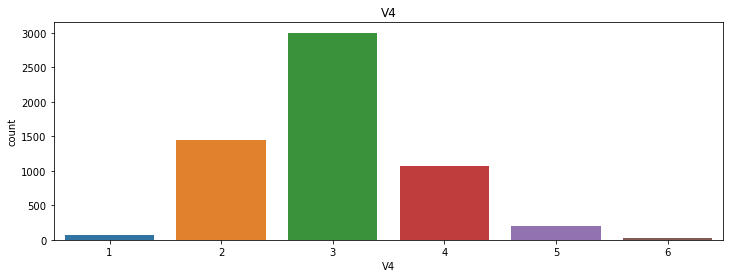

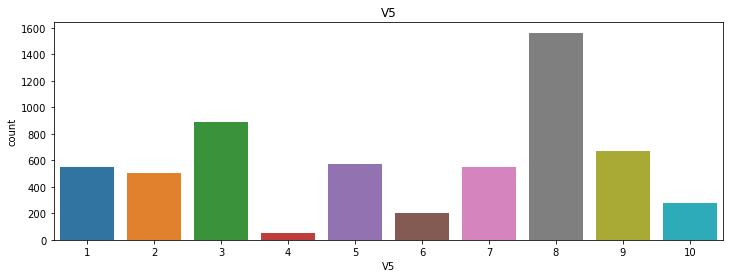

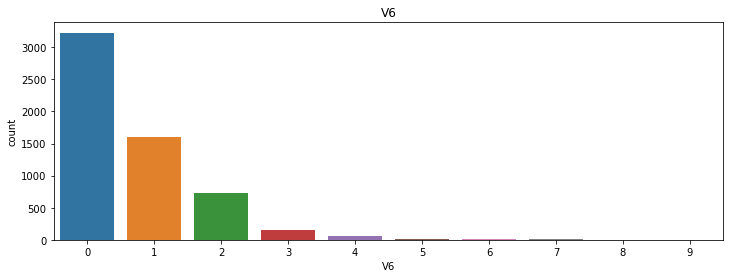

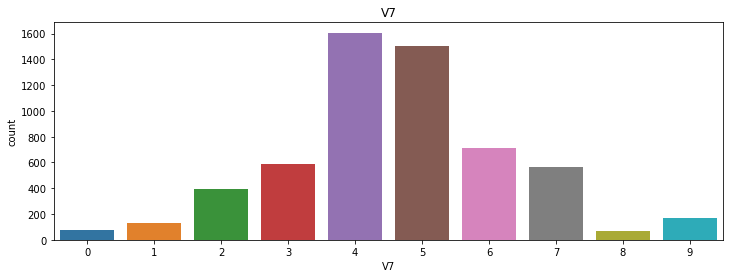

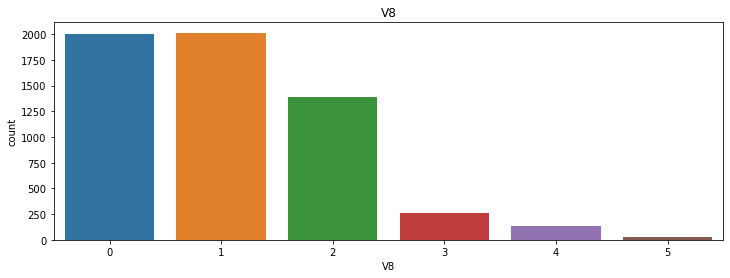

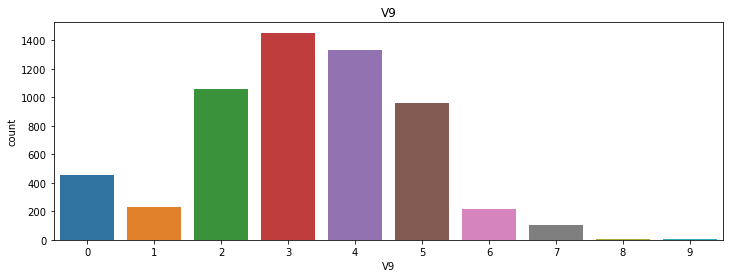

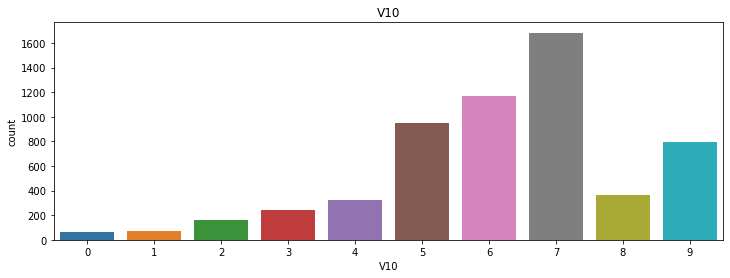

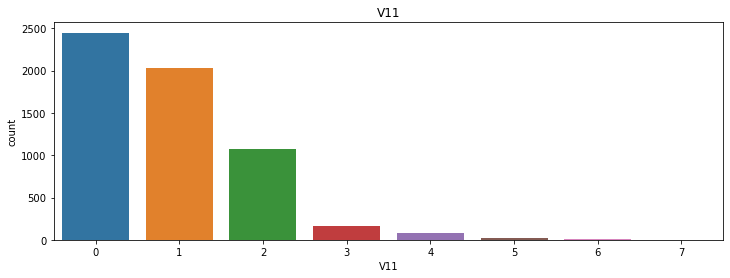

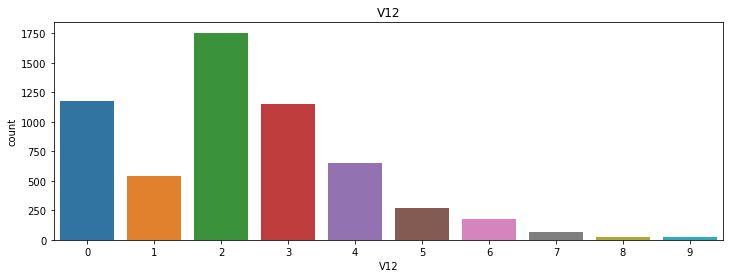

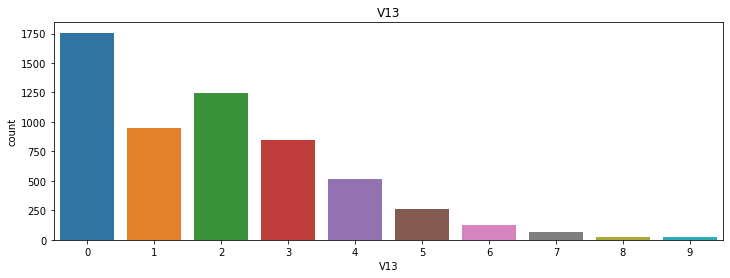

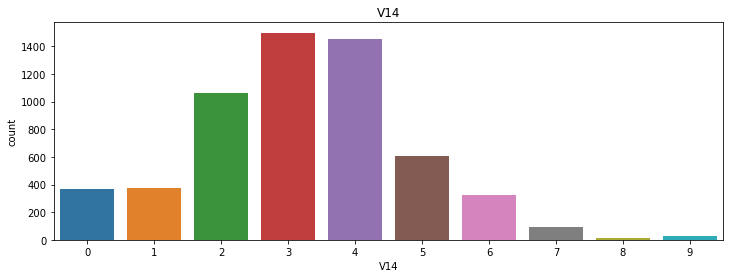

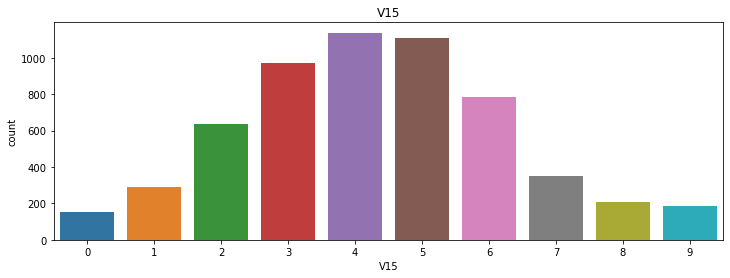

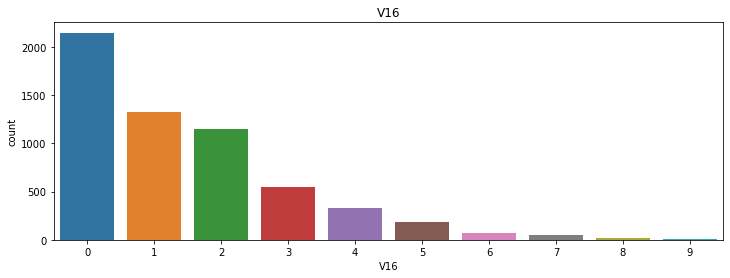

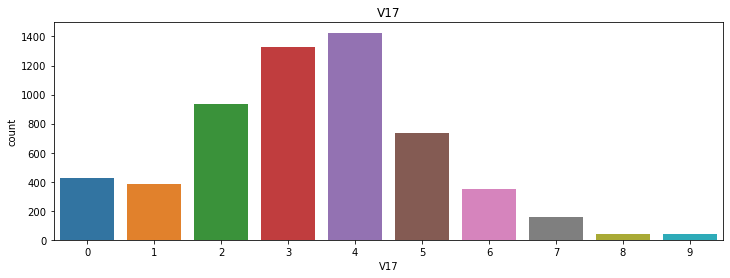

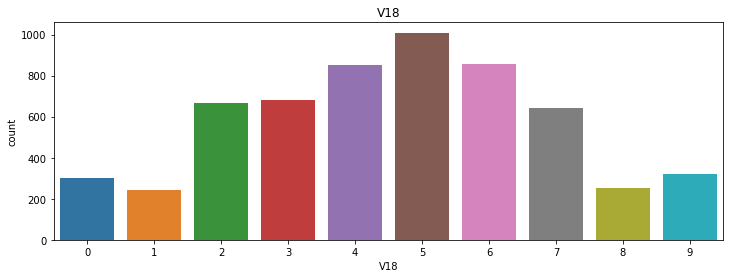

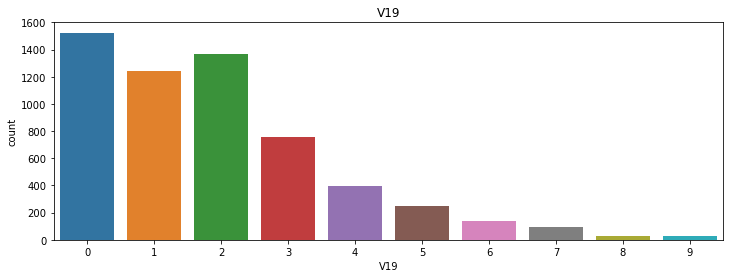

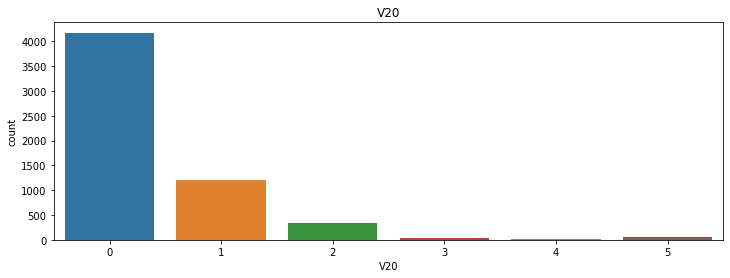

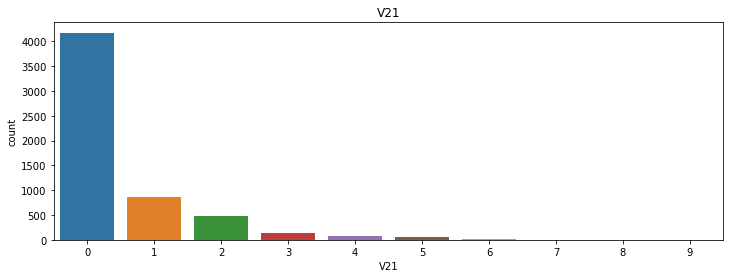

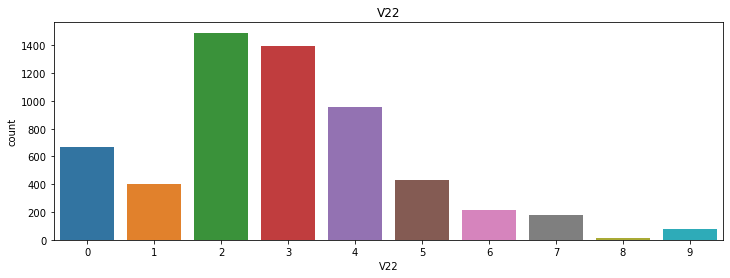

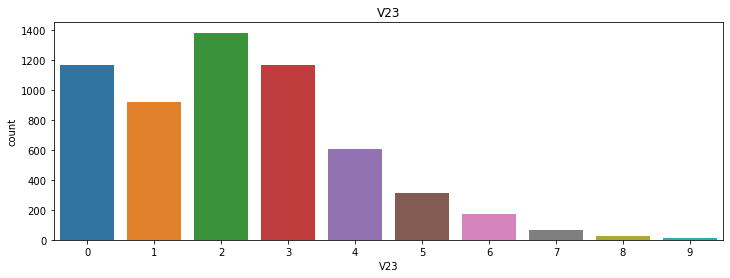

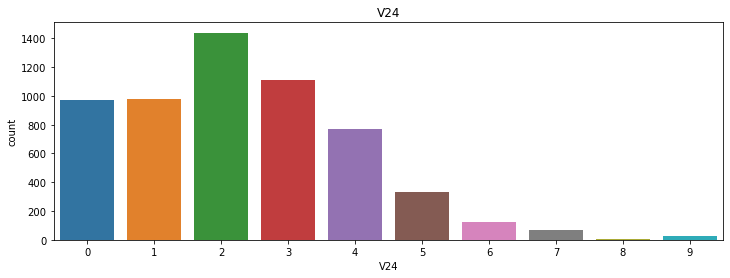

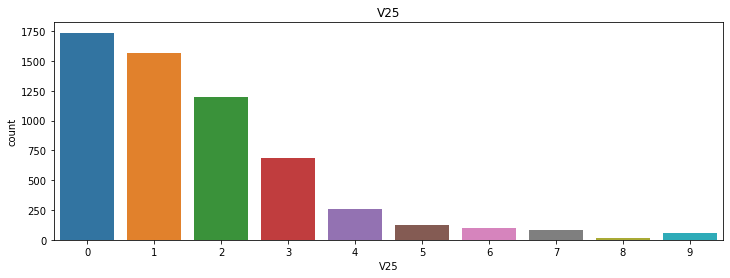

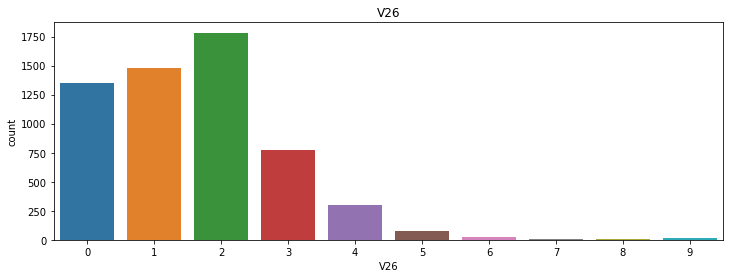

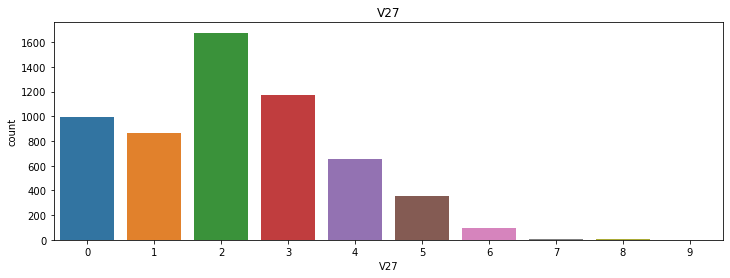

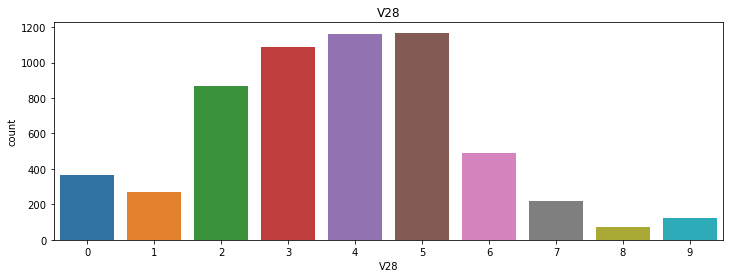

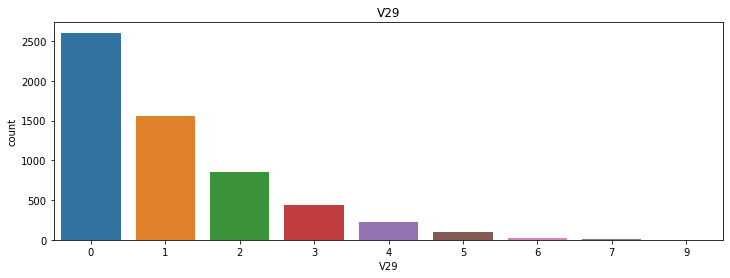

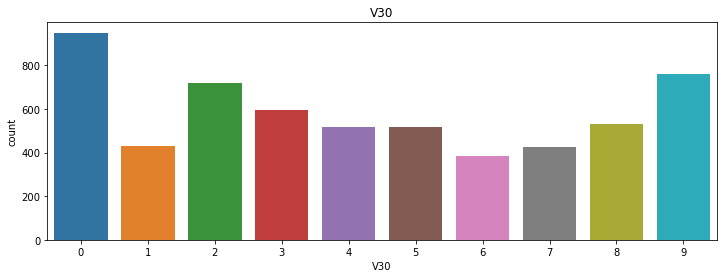

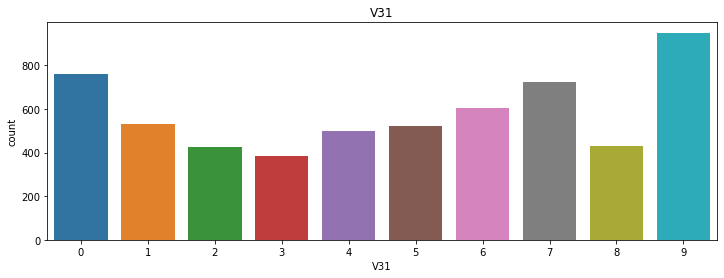

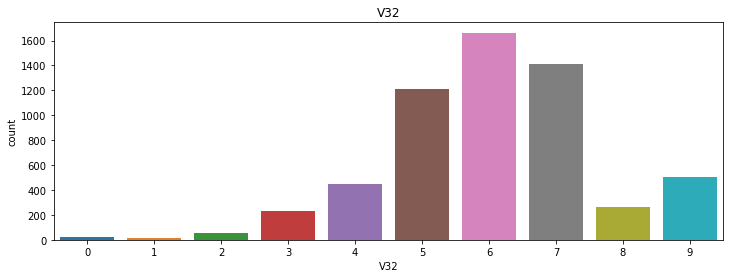

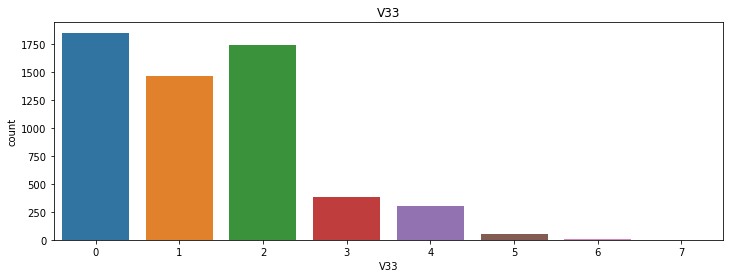

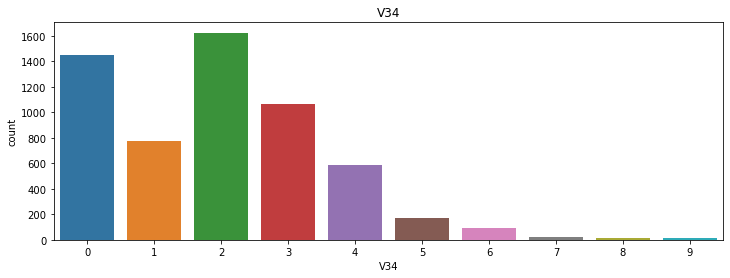

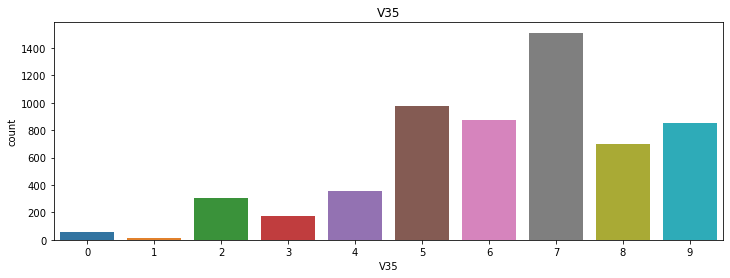

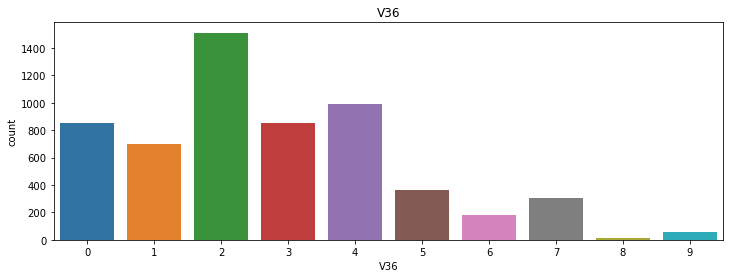

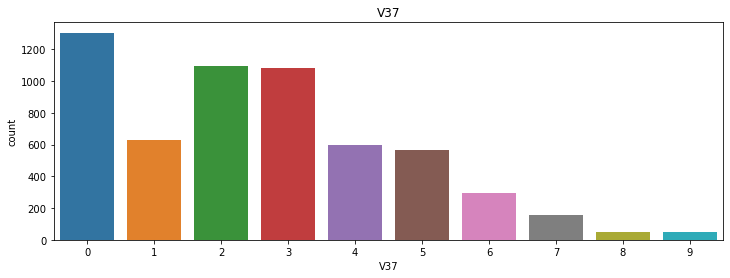

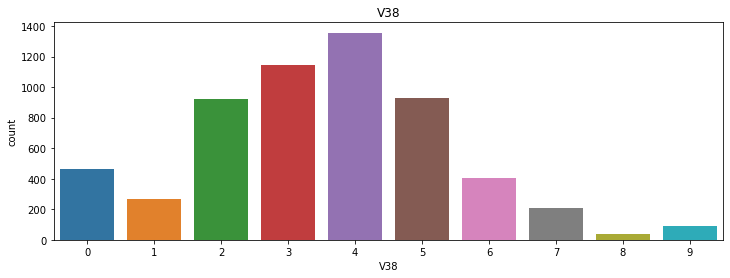

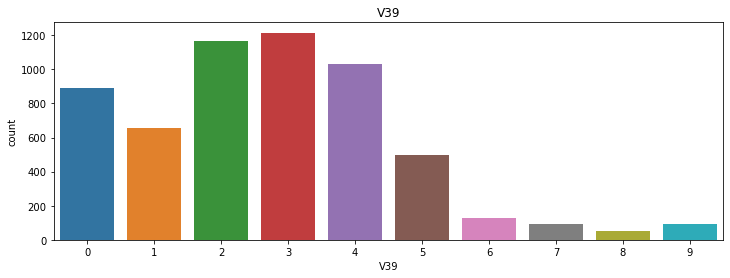

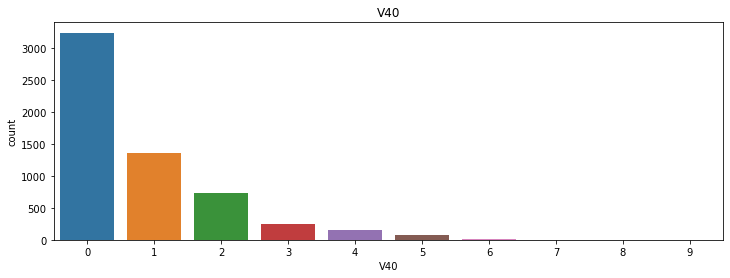

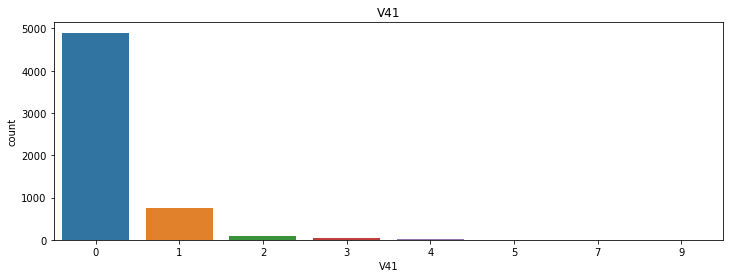

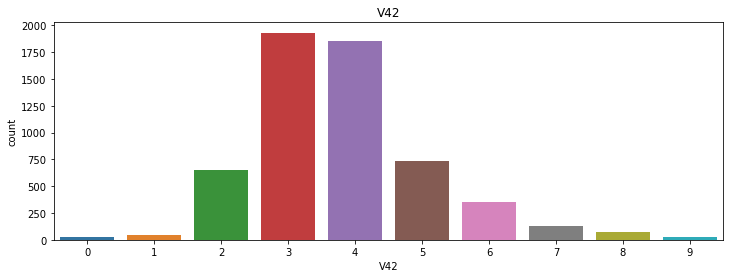

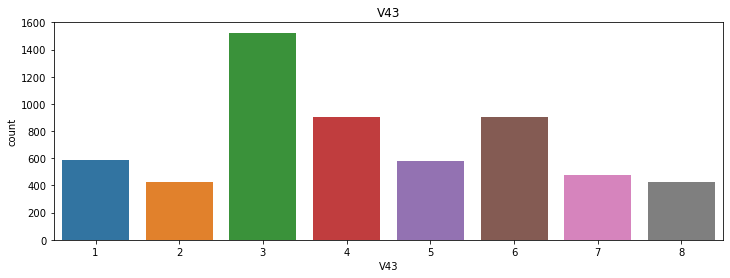

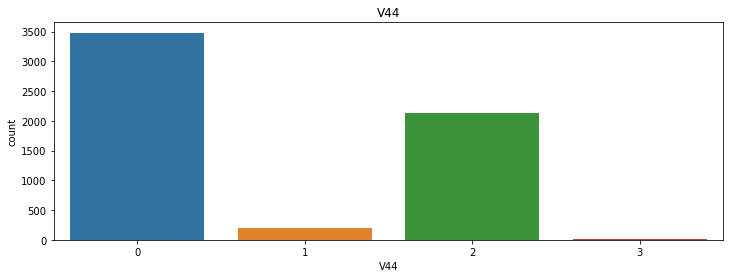

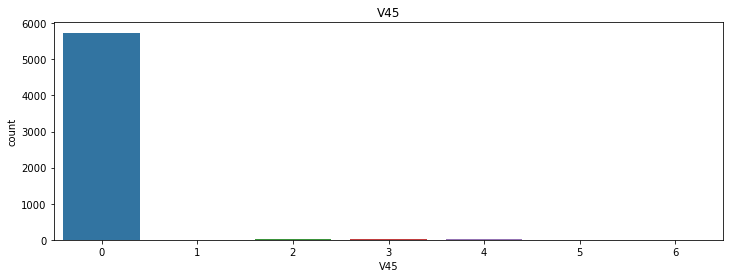

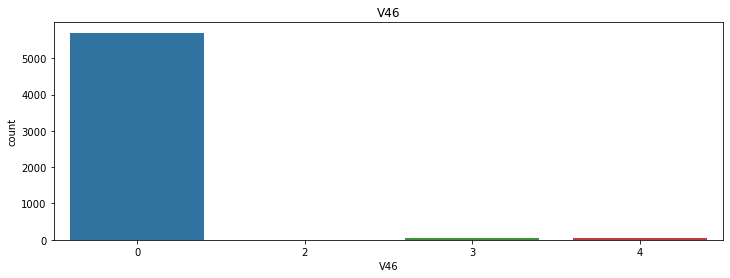

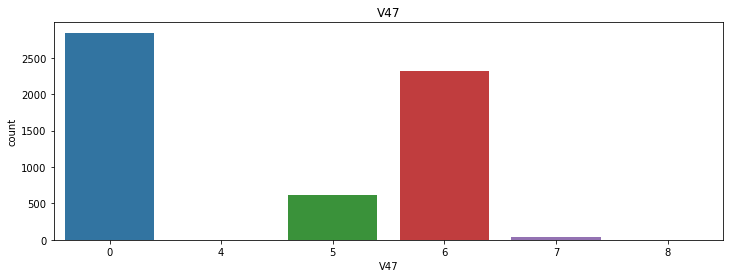

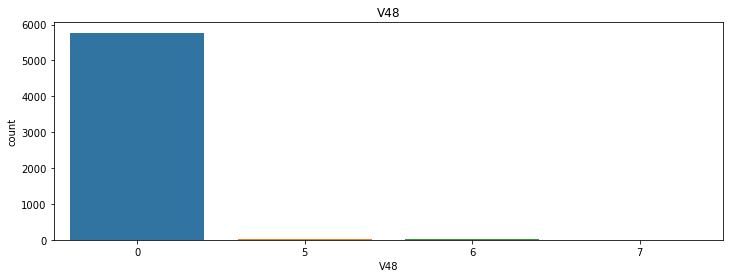

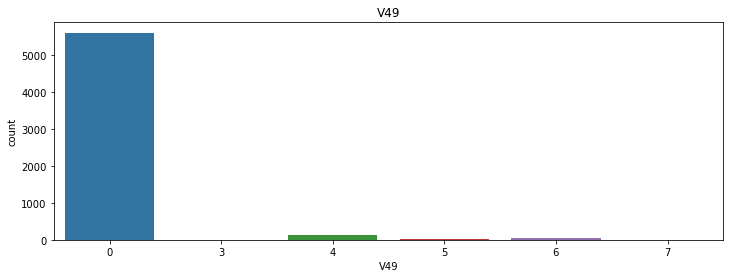

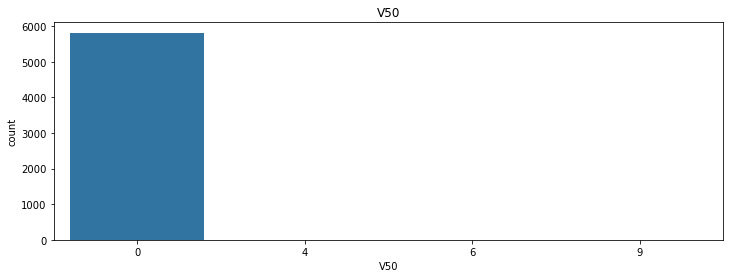

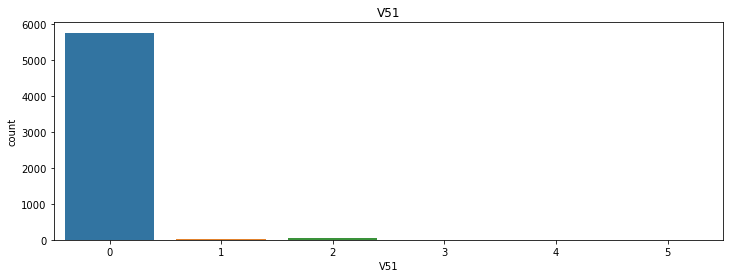

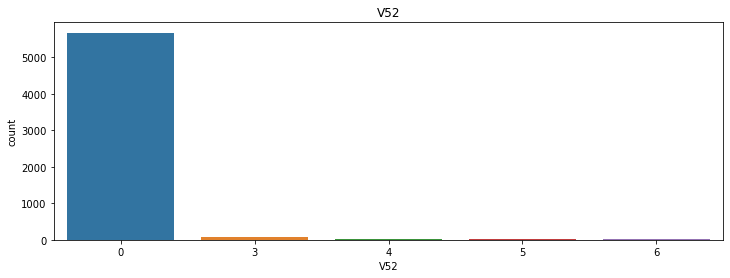

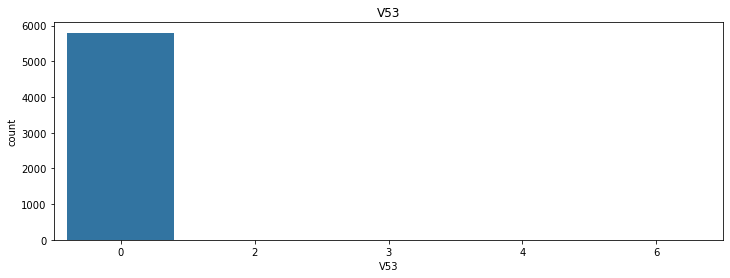

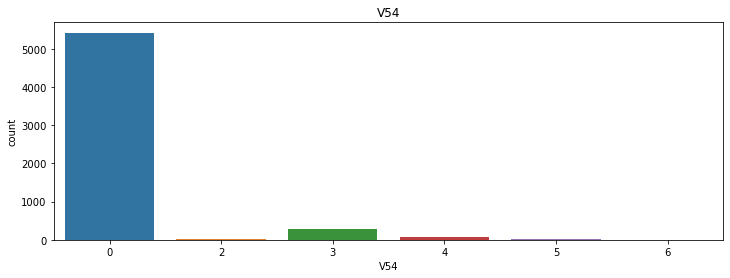

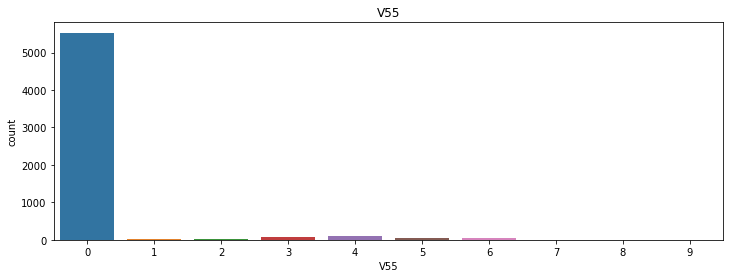

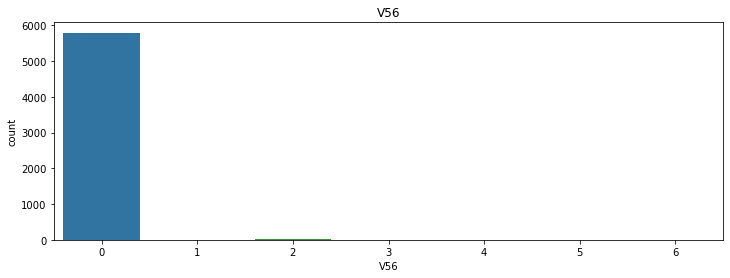

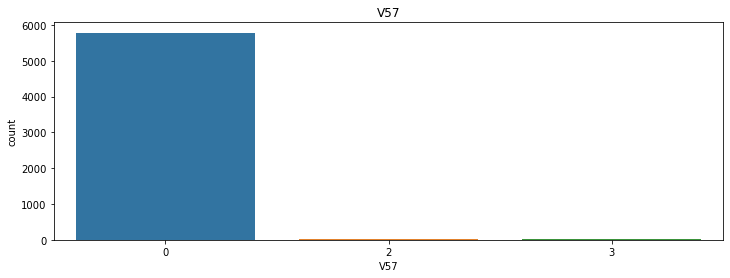

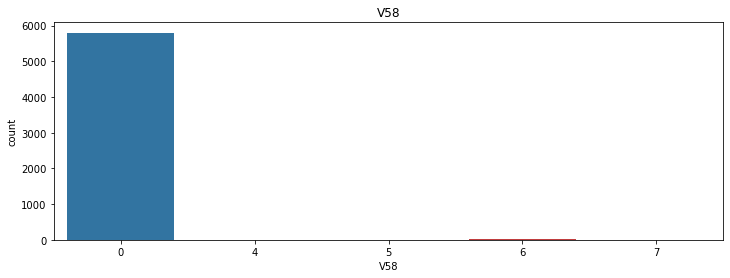

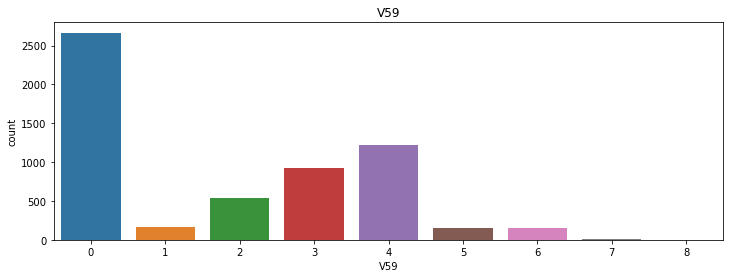

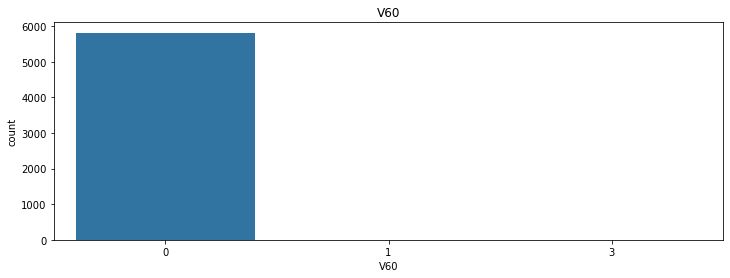

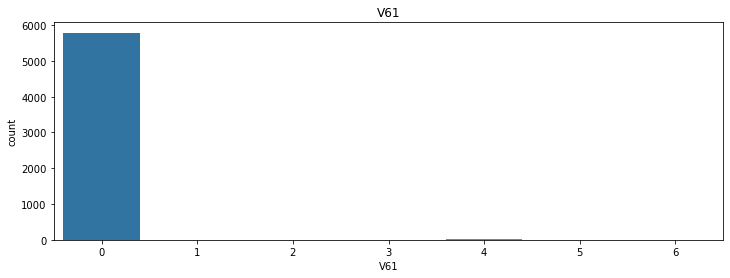

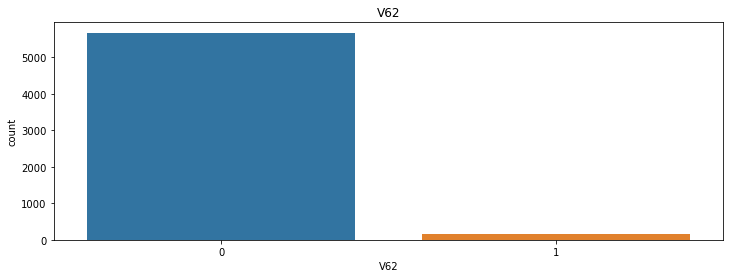

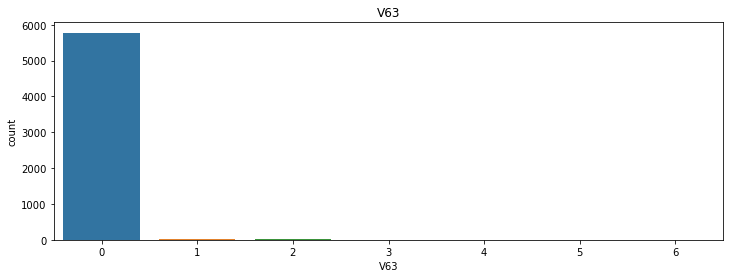

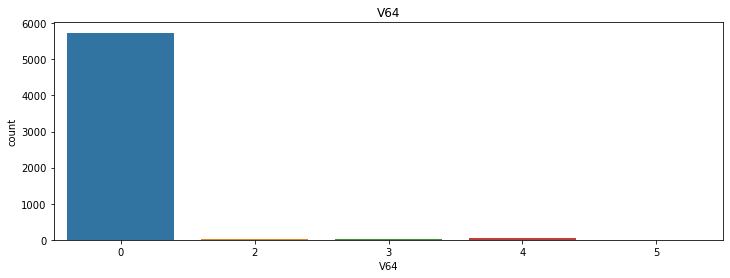

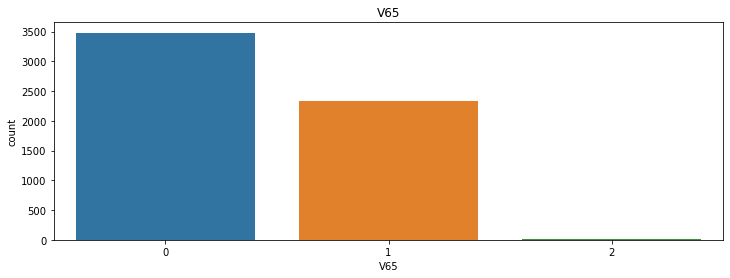

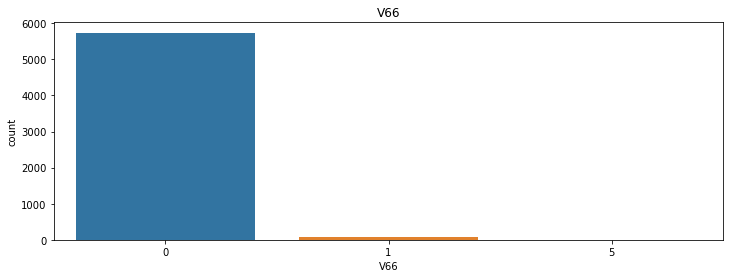

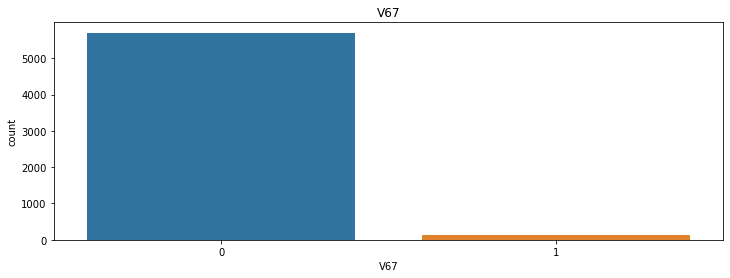

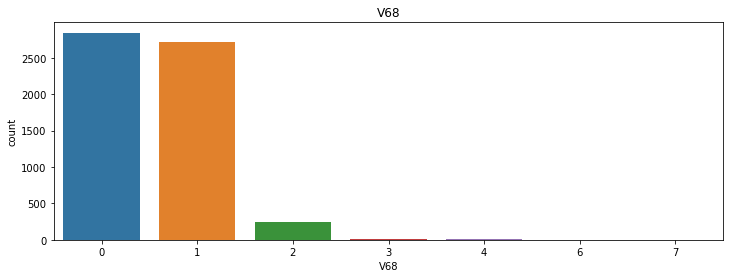

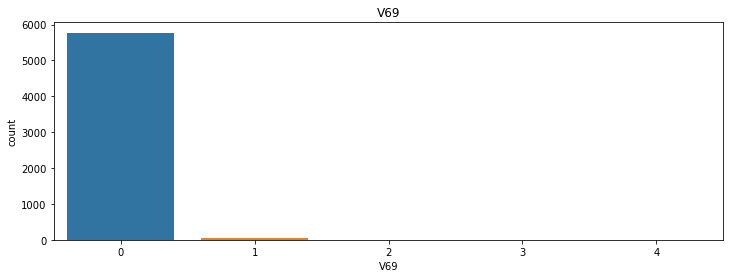

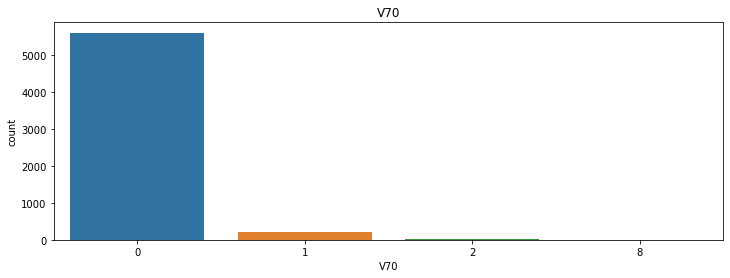

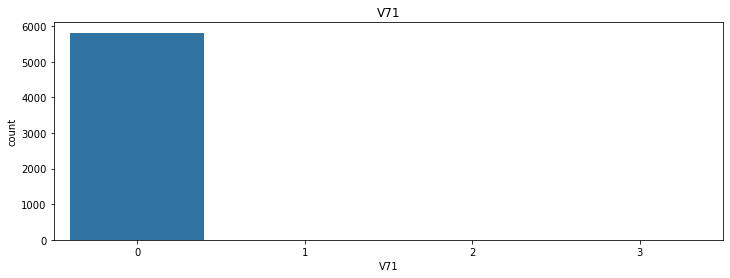

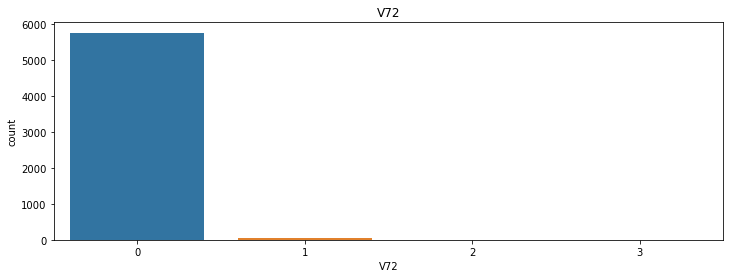

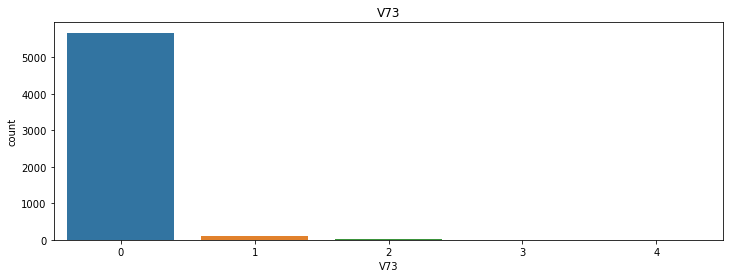

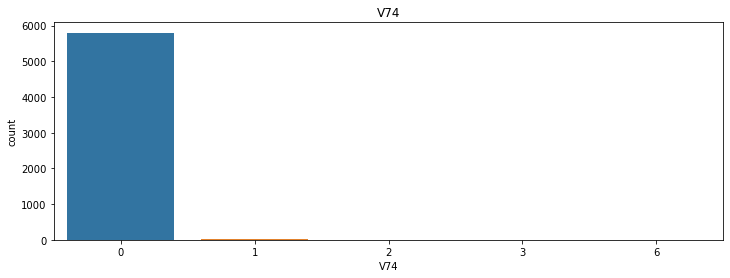

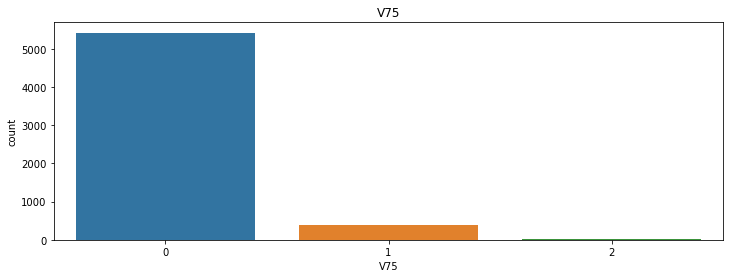

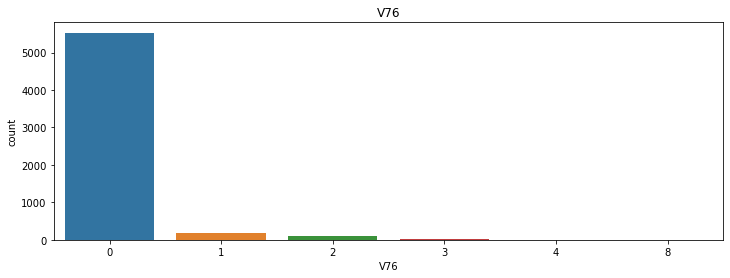

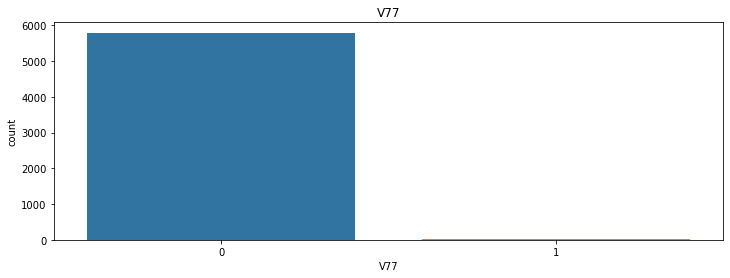

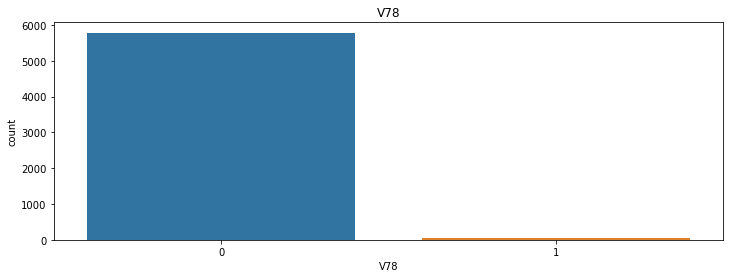

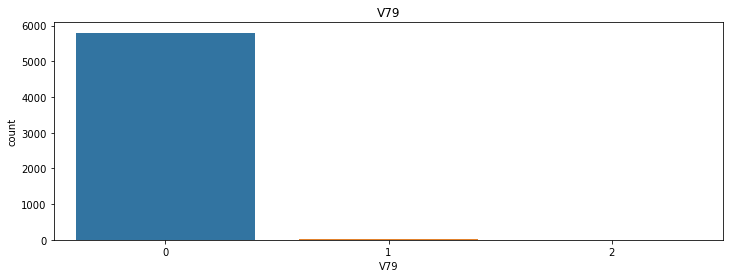

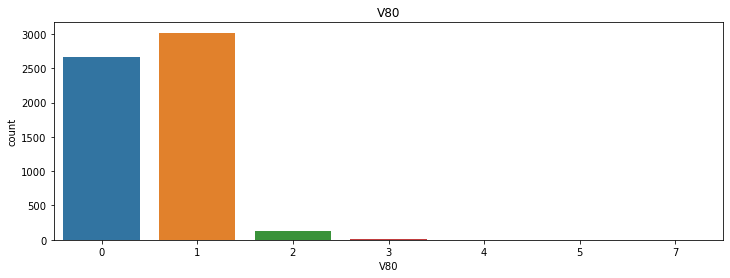

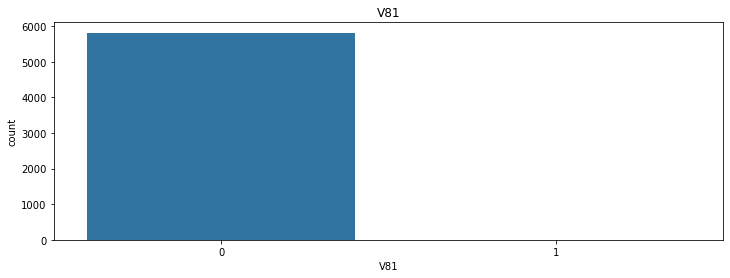

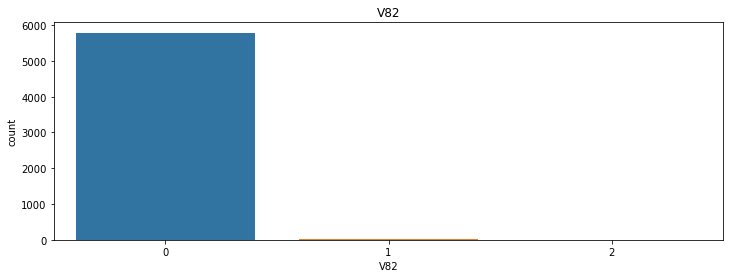

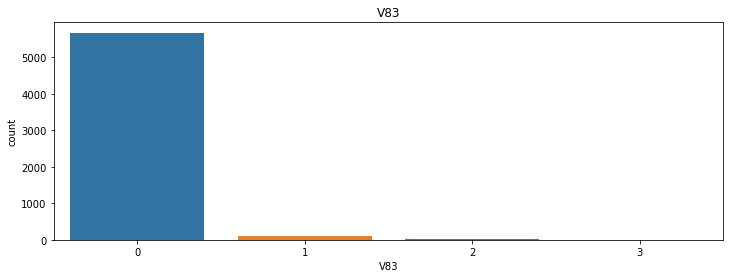

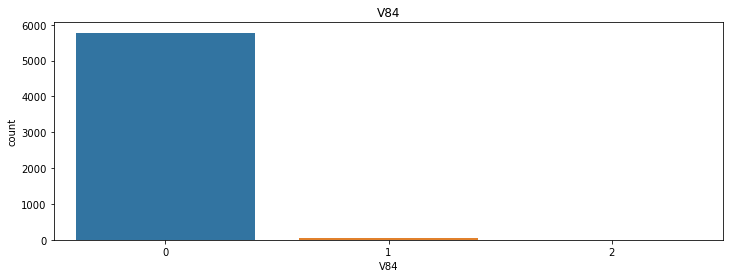

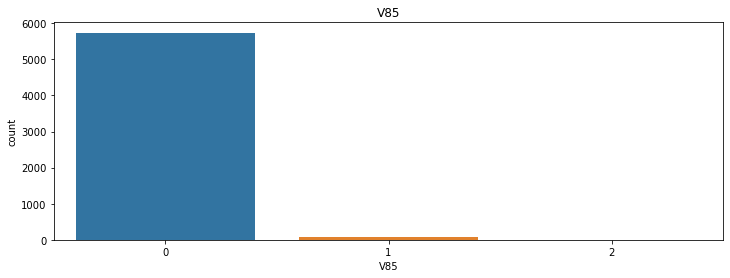

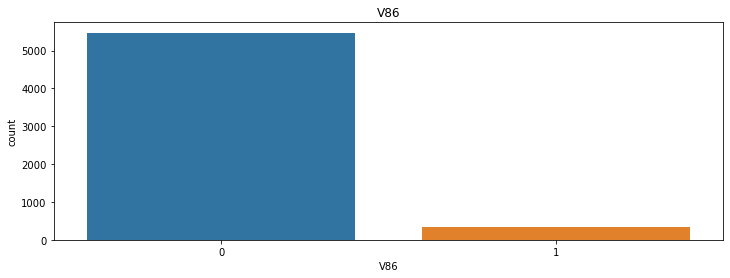

In [102]:
for feature in discrete_features:
    data=car_train.copy()
    
    plt.figure(figsize=(12,4))
    sns.countplot(x=feature,data=data)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)

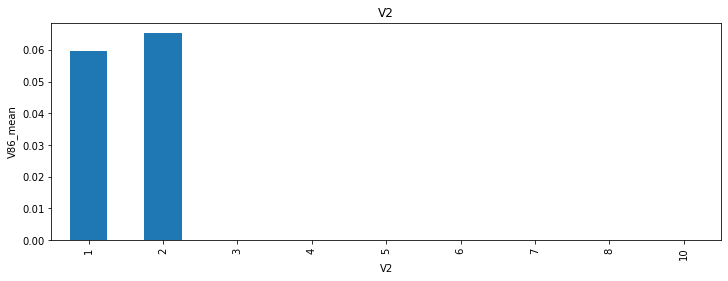

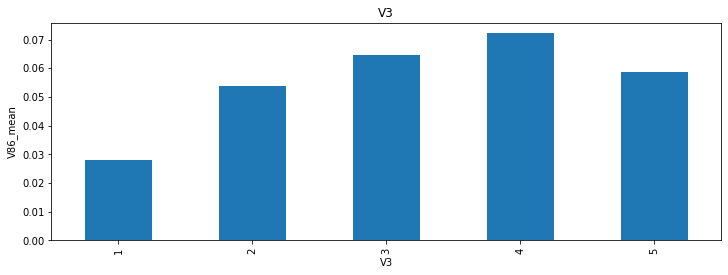

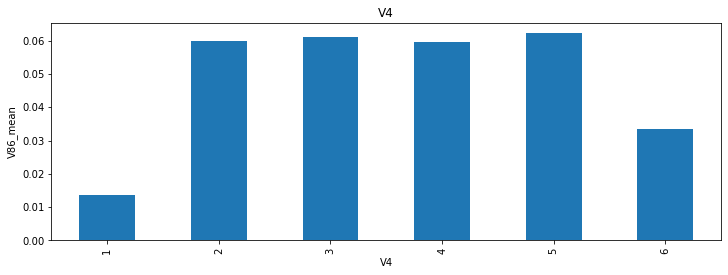

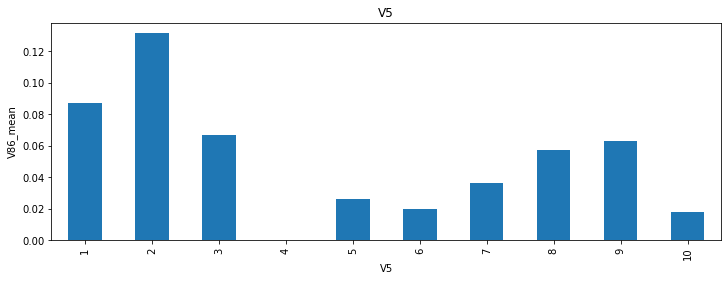

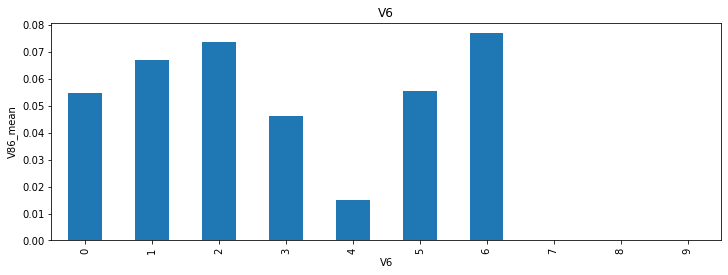

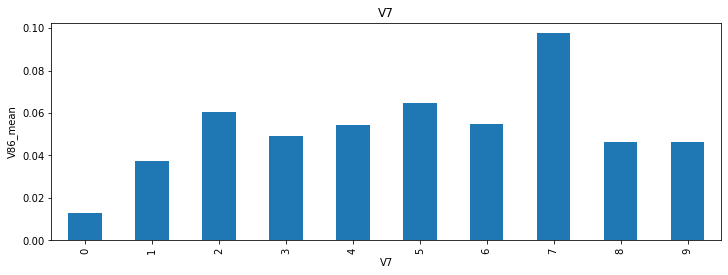

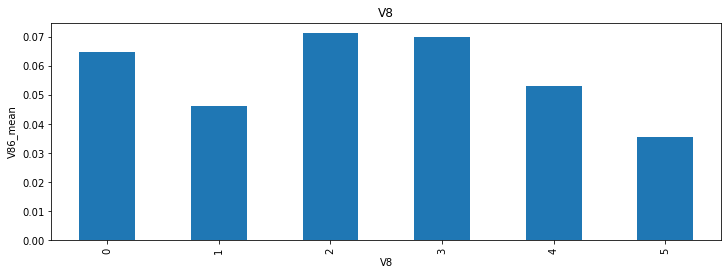

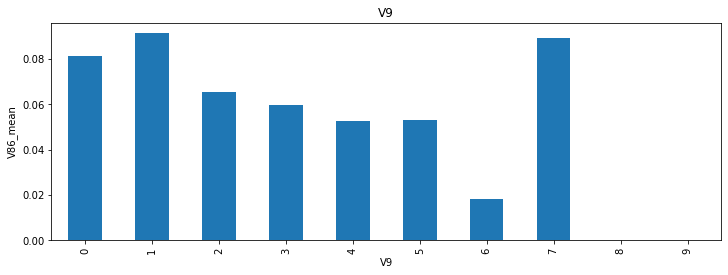

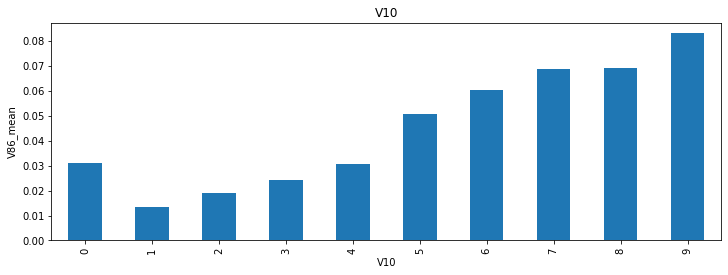

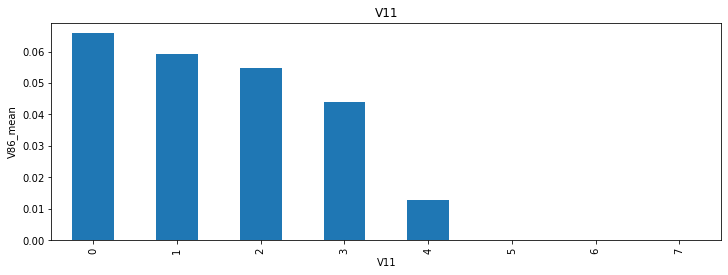

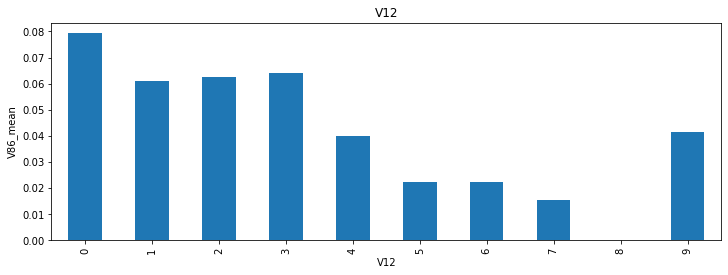

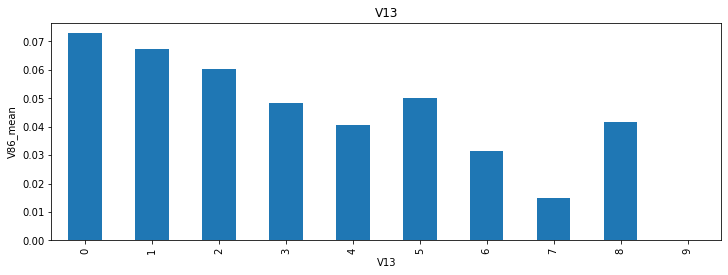

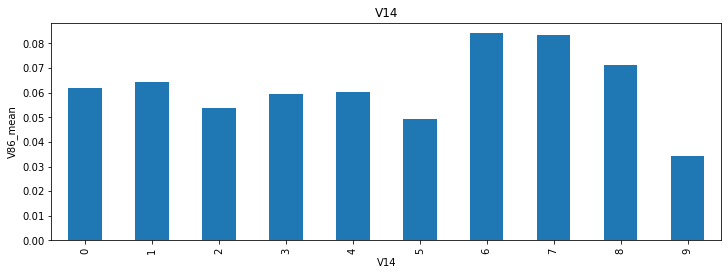

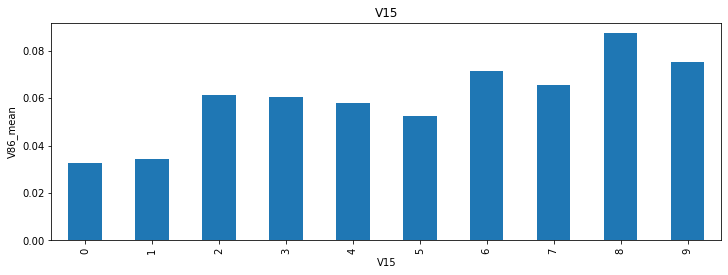

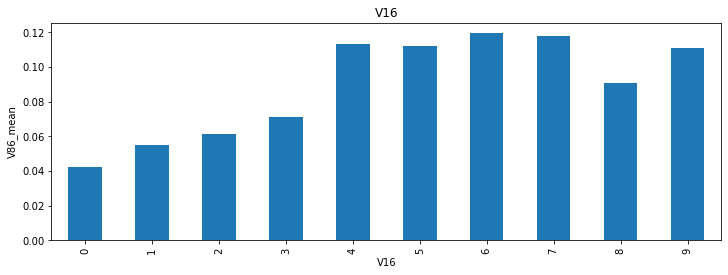

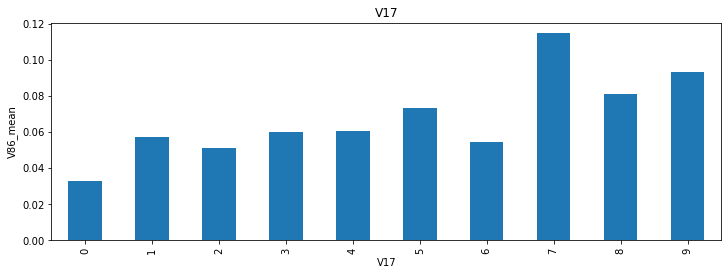

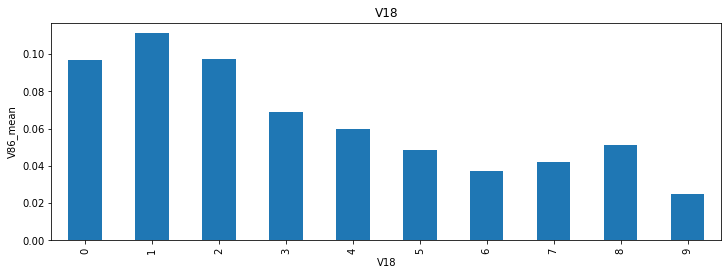

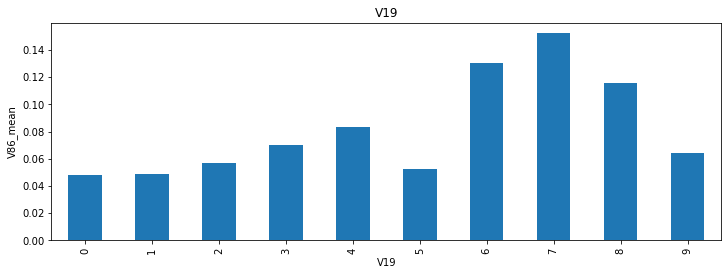

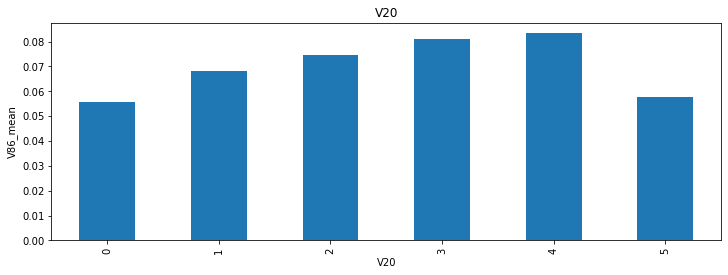

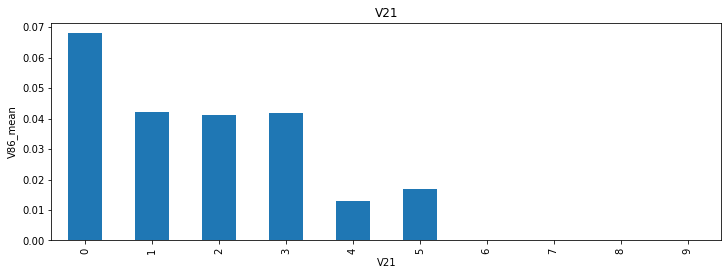

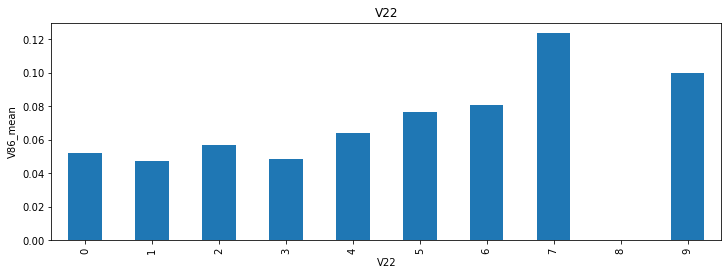

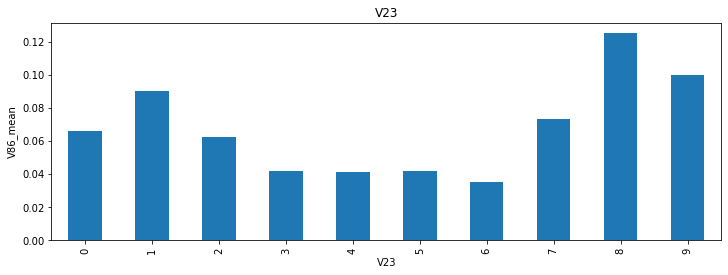

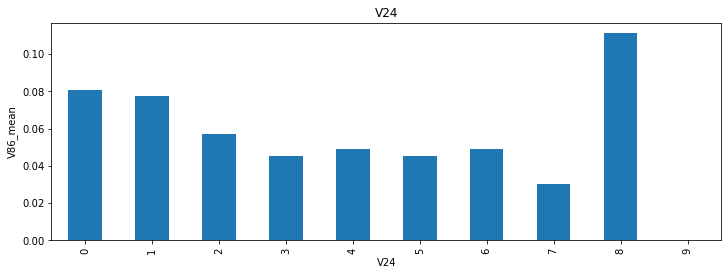

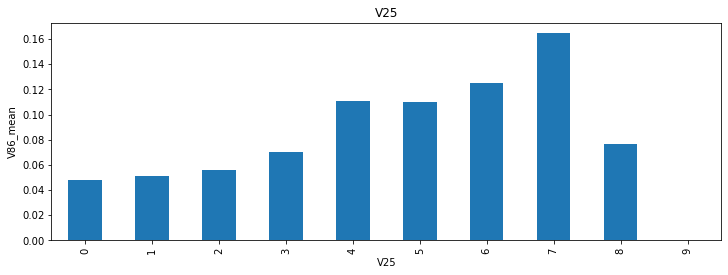

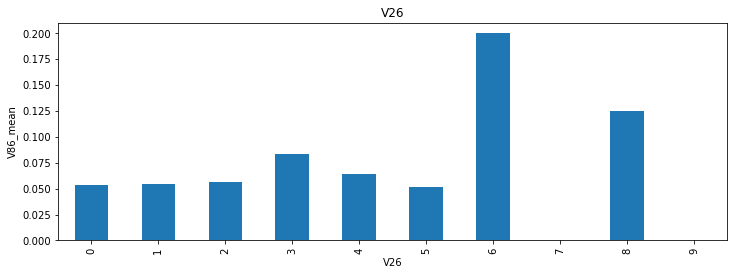

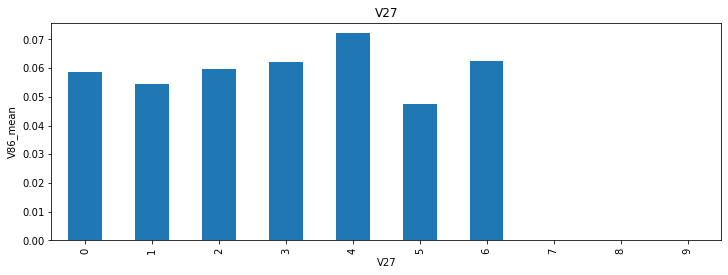

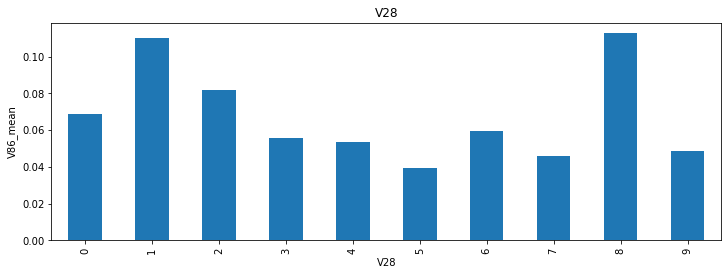

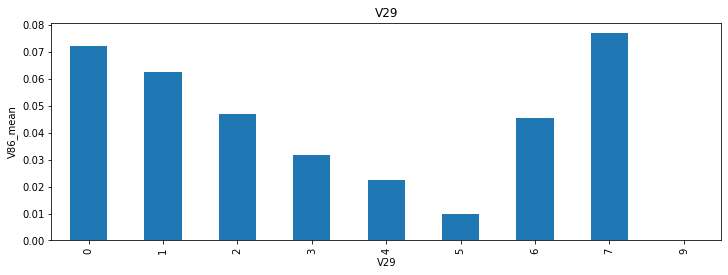

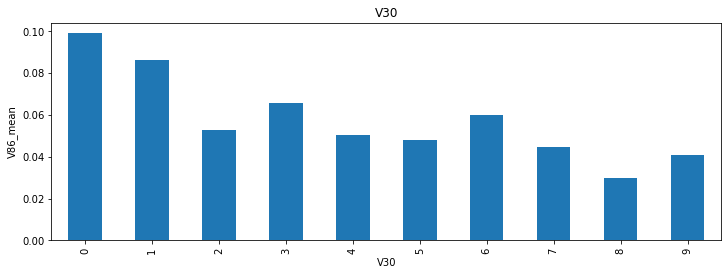

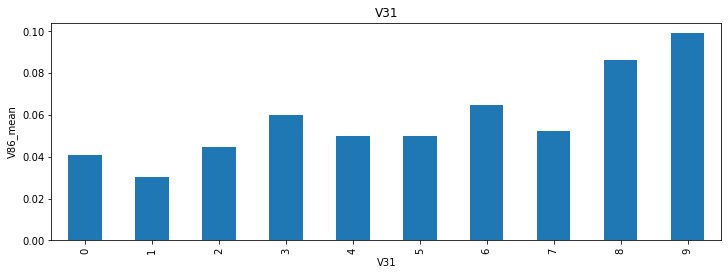

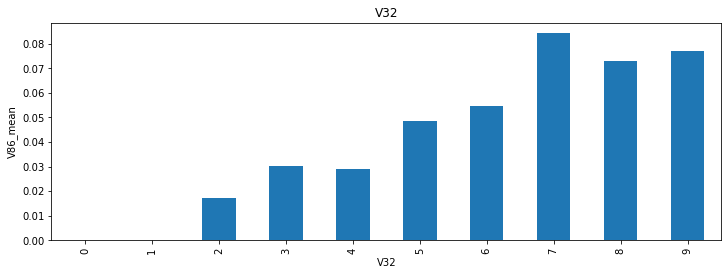

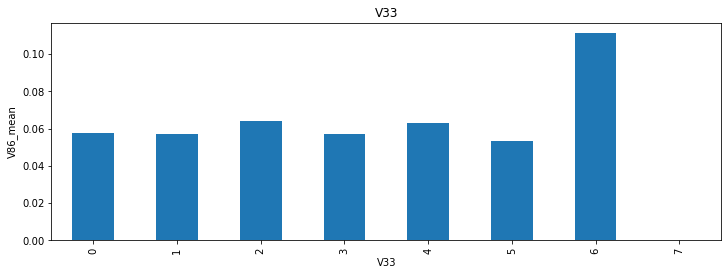

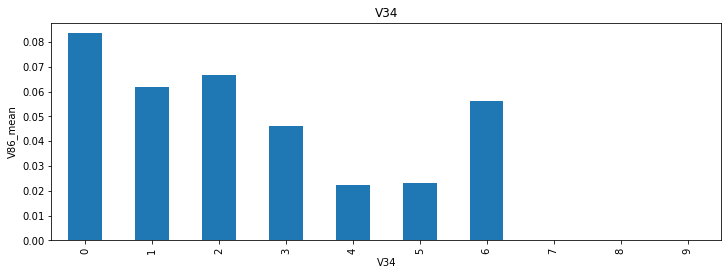

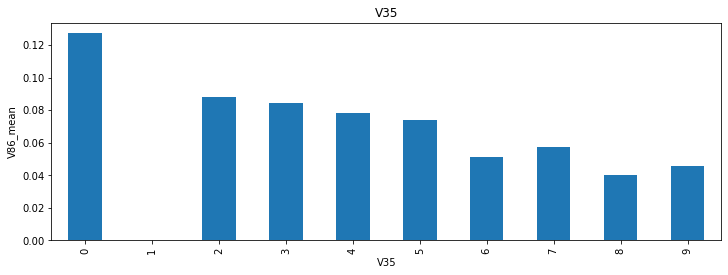

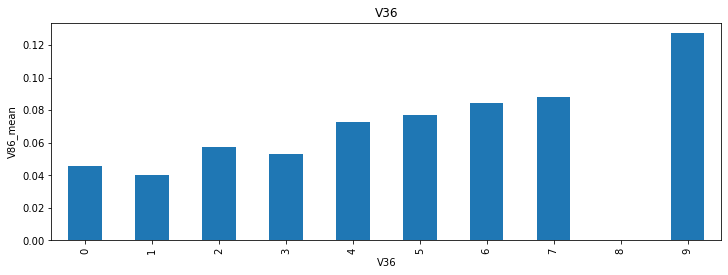

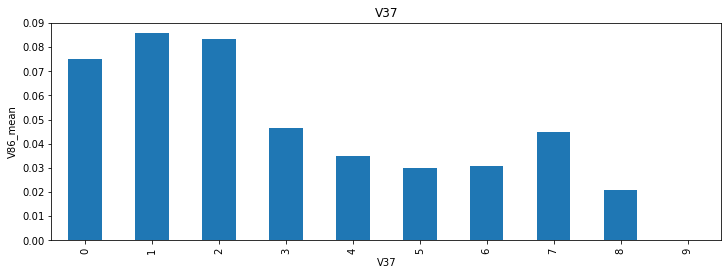

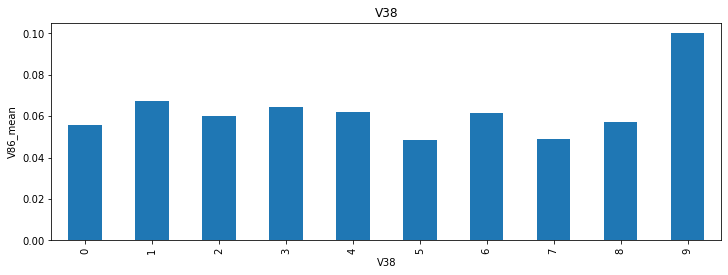

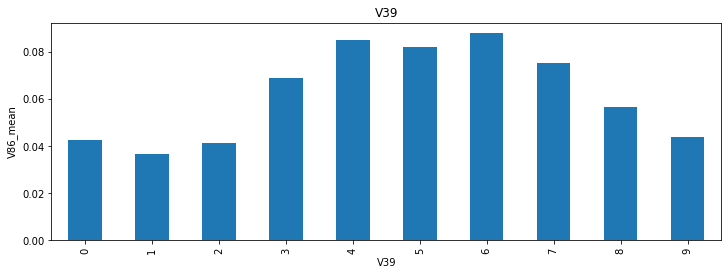

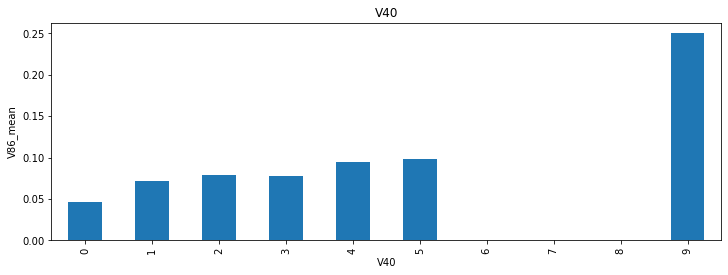

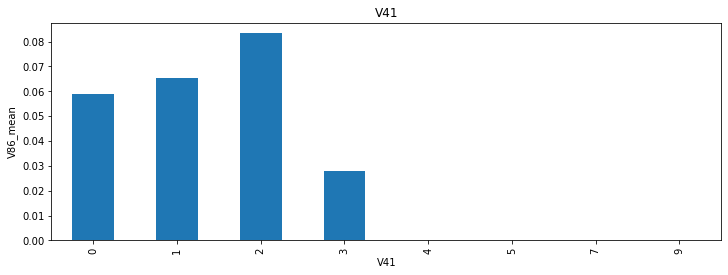

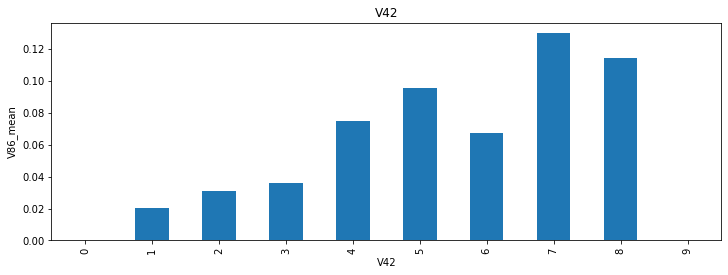

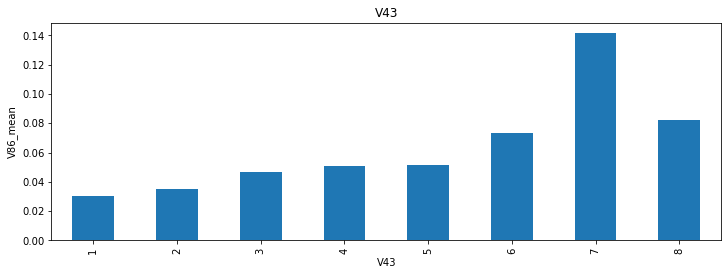

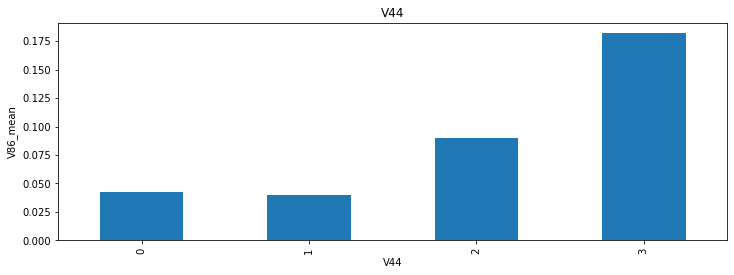

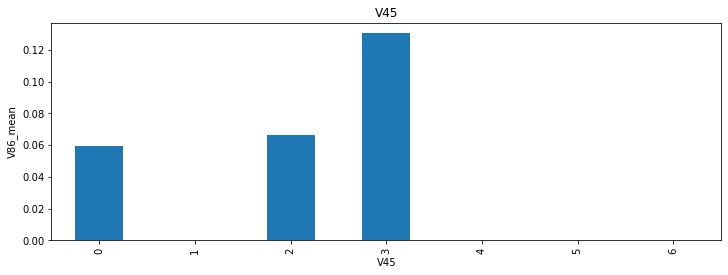

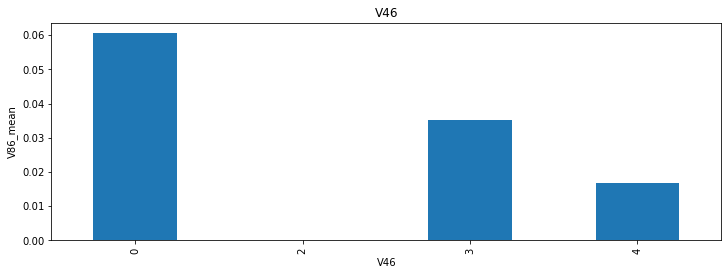

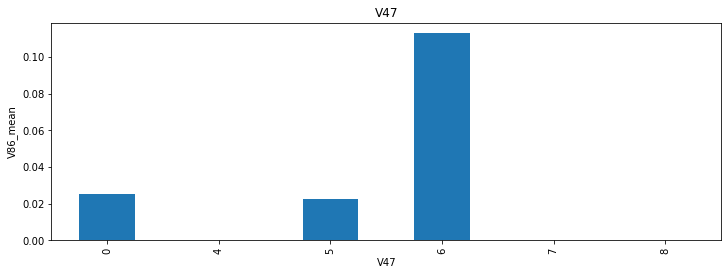

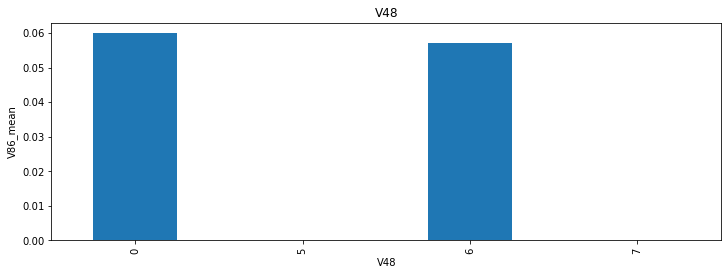

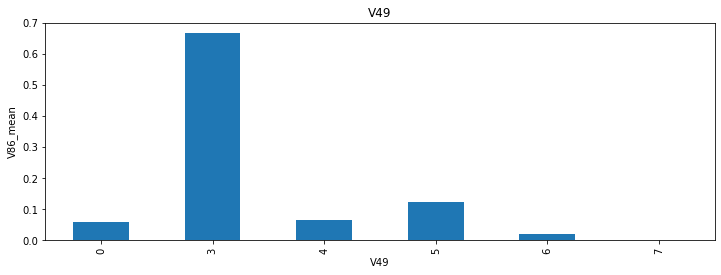

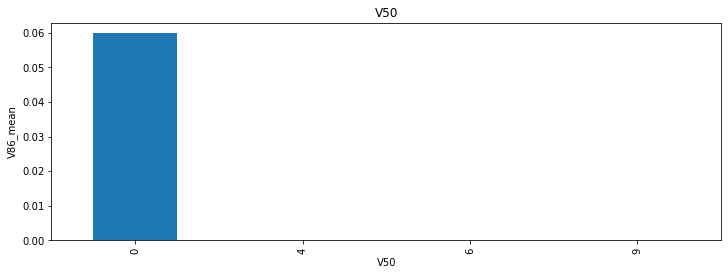

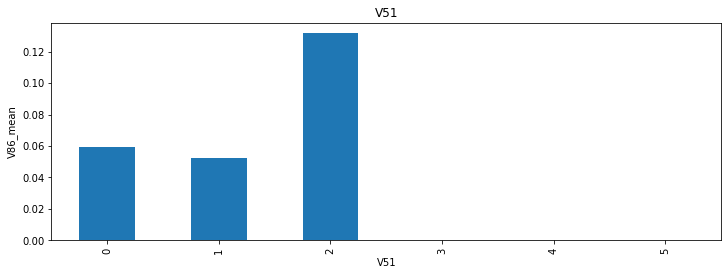

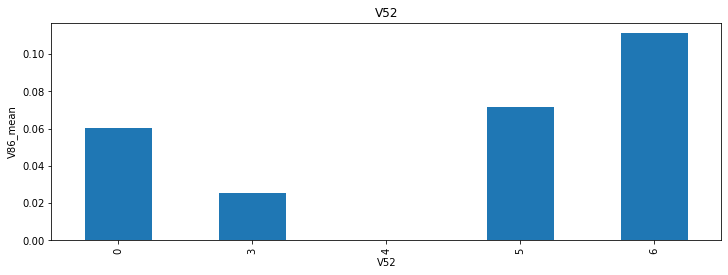

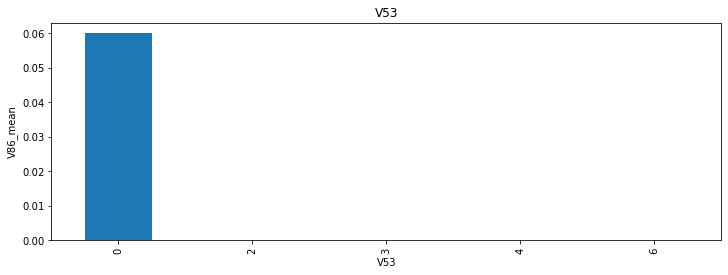

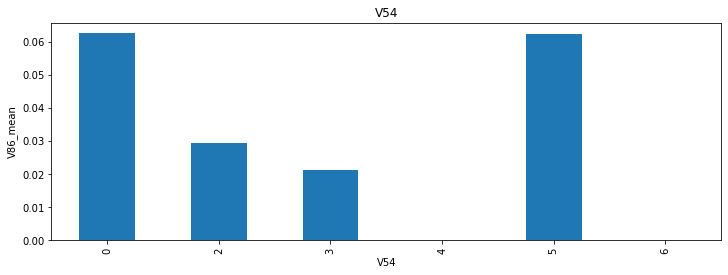

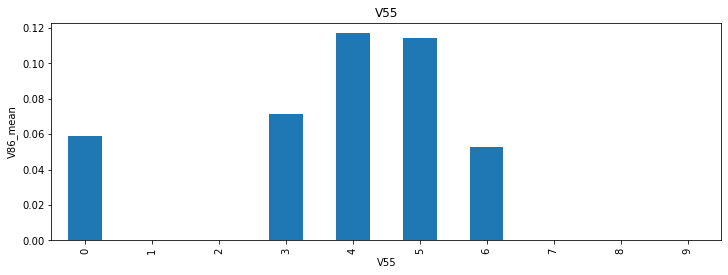

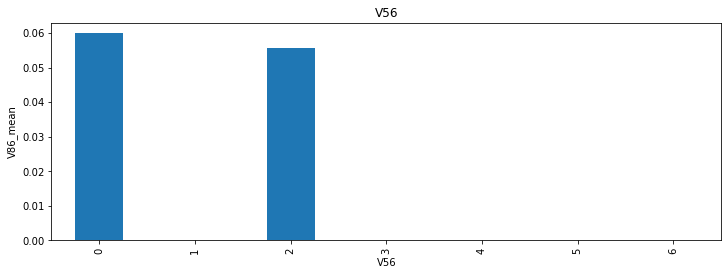

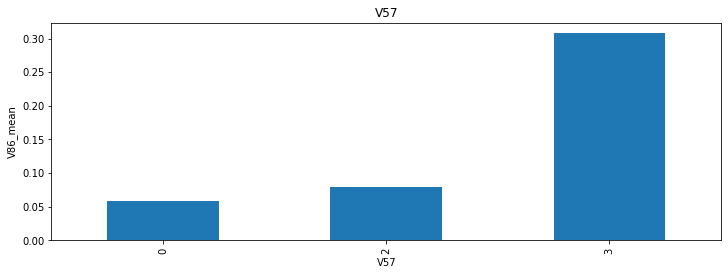

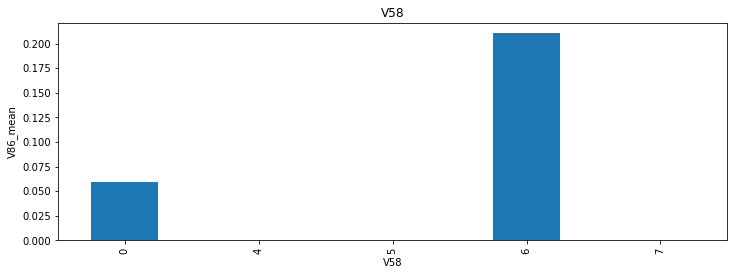

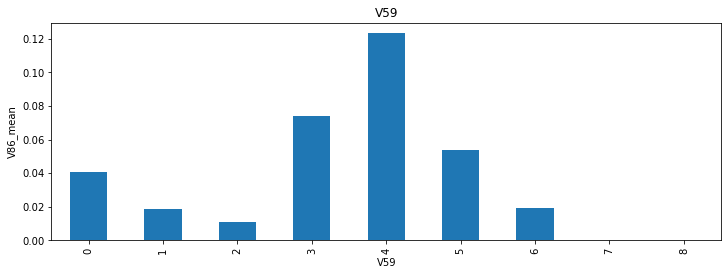

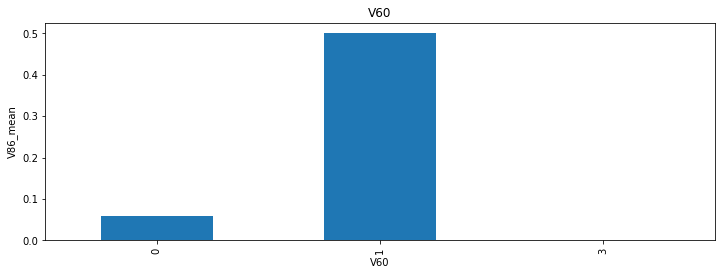

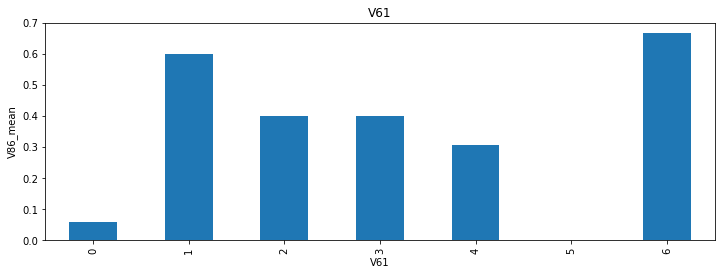

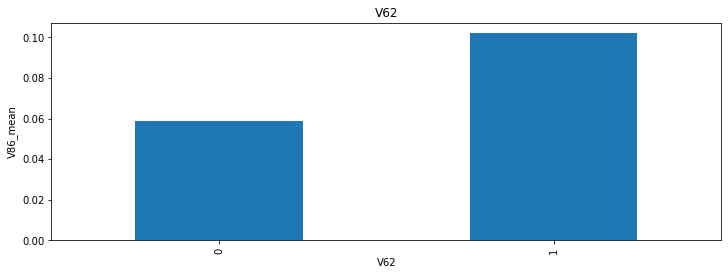

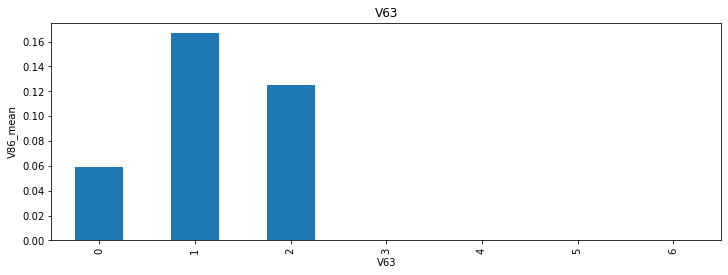

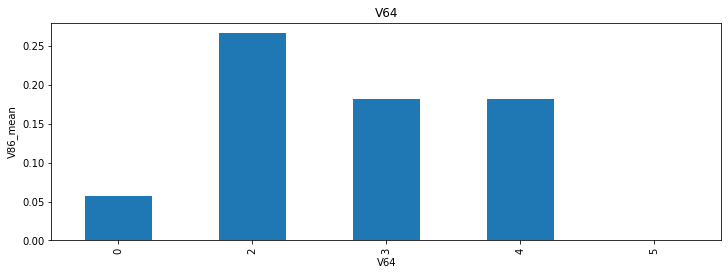

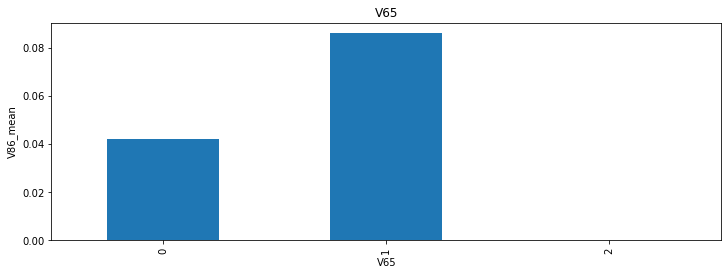

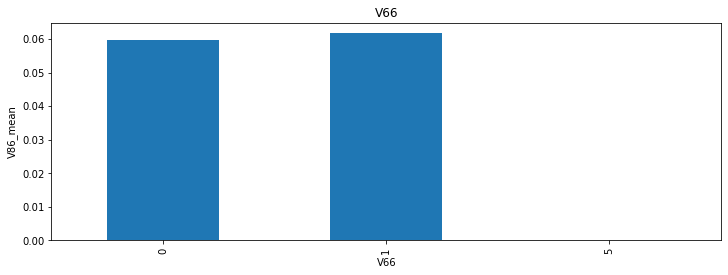

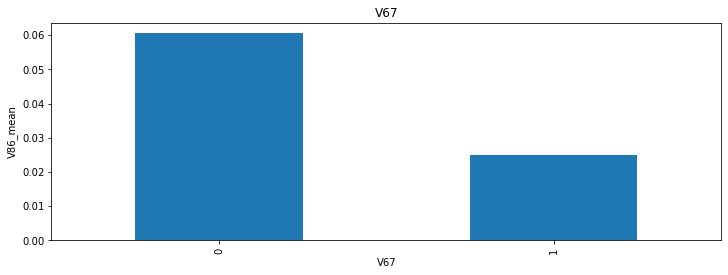

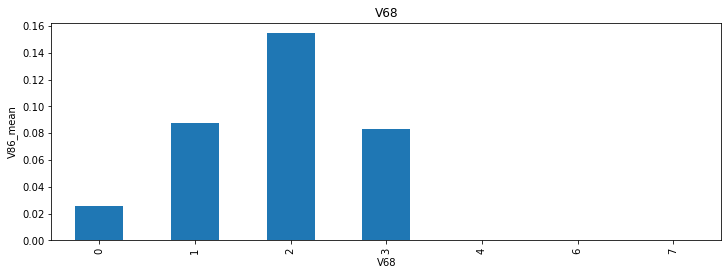

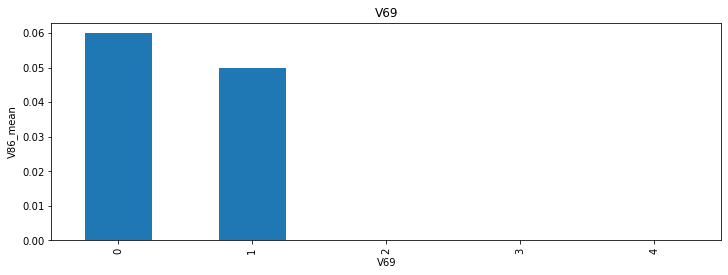

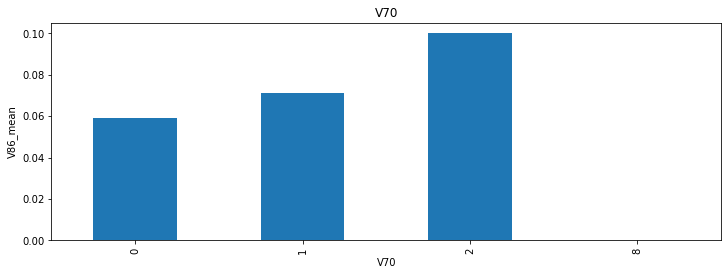

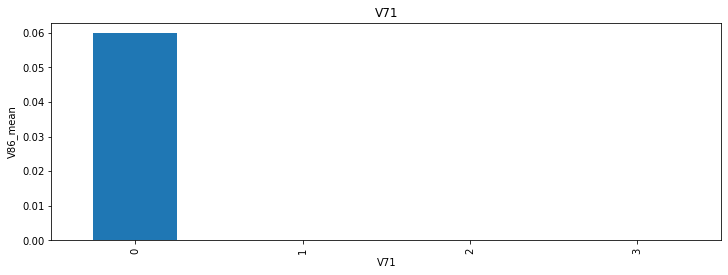

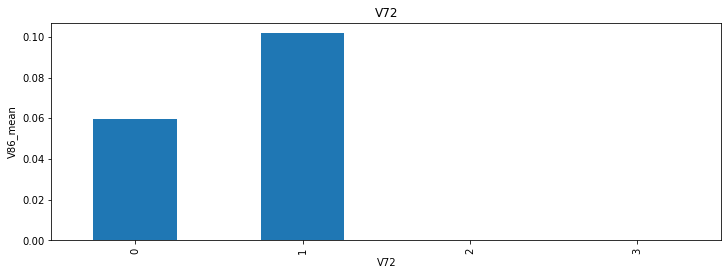

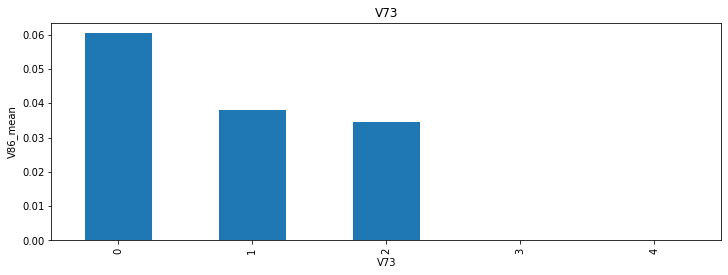

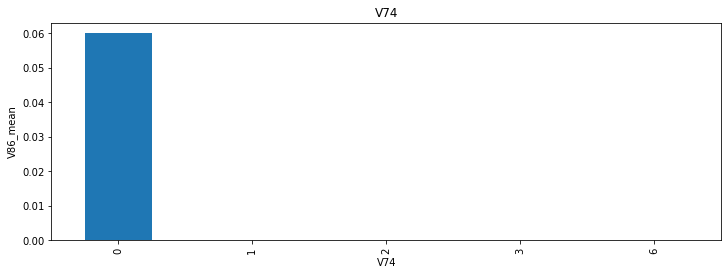

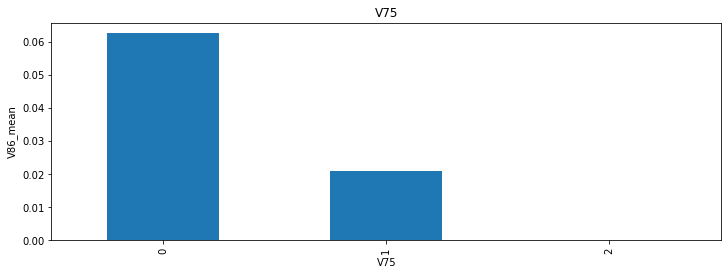

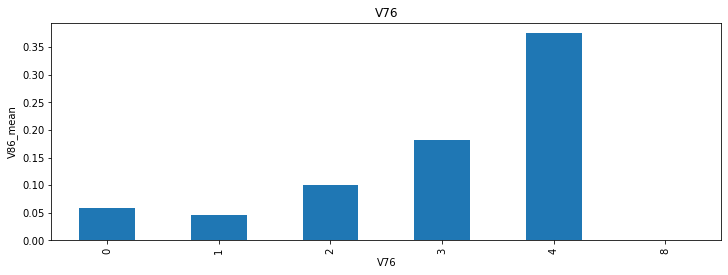

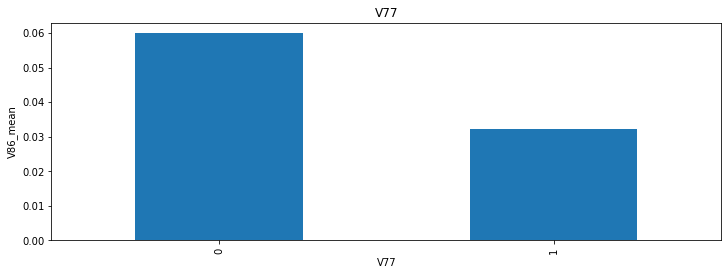

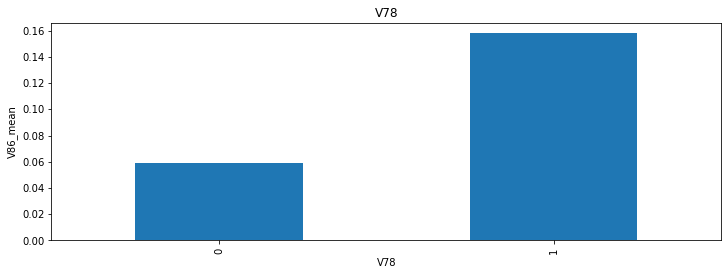

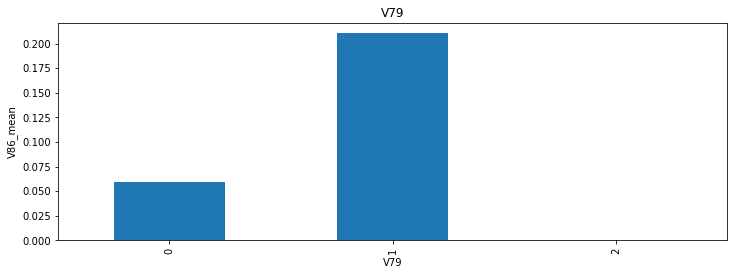

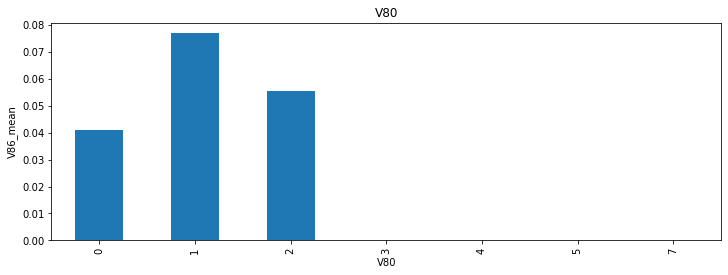

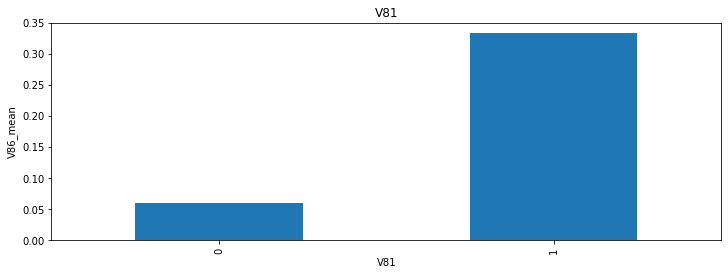

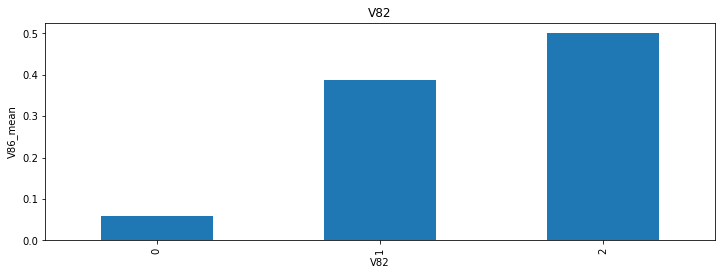

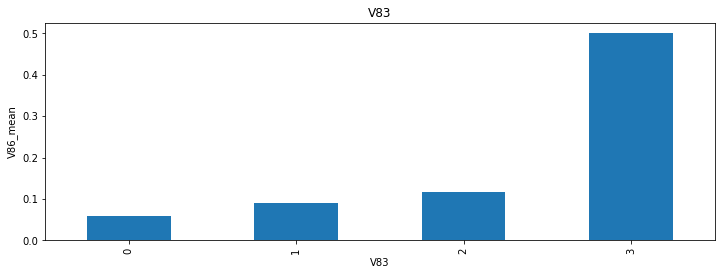

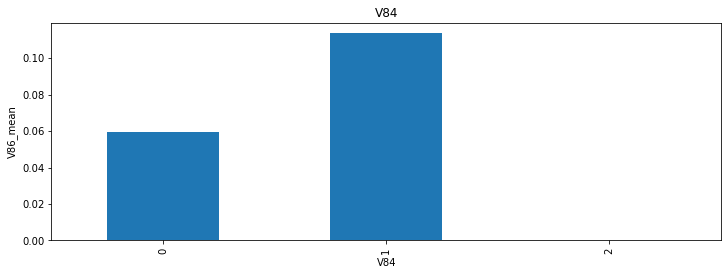

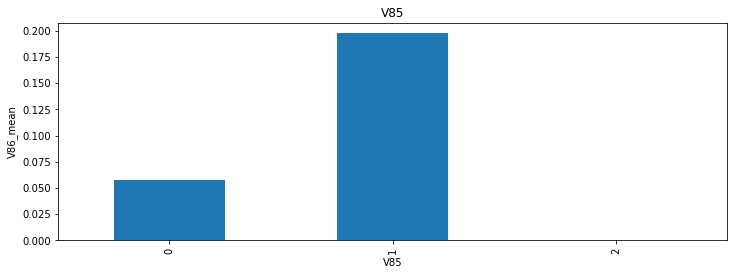

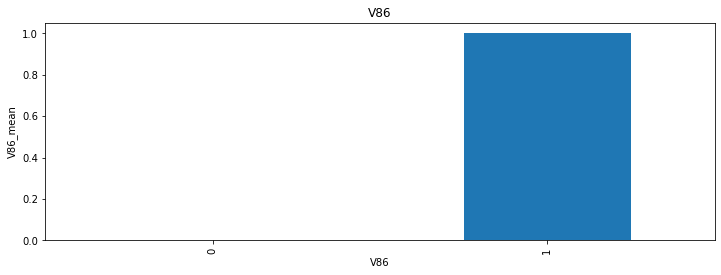

In [105]:
# lets see the relationship with dependent variable

for feature in discrete_features:
    data=car_train.copy()
    
    plt.figure(figsize=(12,4))
    data.groupby(feature)['V86'].mean().plot.bar()
    #sns.barplot(x=a,data=data)
    plt.xlabel(feature)
    plt.ylabel('V86_mean')
    plt.title(feature)

In [7]:
# Continuous Features
continuous_features=[feature for feature in car_train.columns if feature not in discrete_features]
print('Number of Continuous: {}'.format(len(continuous_features)))

car_train[continuous_features].head()

Number of Continuous: 1


,V1
0,33
1,37
2,37
3,9
4,40


In [8]:
car_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86'],
      dtype='object')

In [9]:
# 'V86' ----> Target variable[Imbalanced data]
# since it is representing only one category
car_train['V86'].value_counts()

0    5474
1     348
Name: V86, dtype: int64

In [10]:
# 'V1'
# there is no order in the sub categories. so label encoding doesn't make sense
# create dummies based on groupby mean on dependent variable
car_train['V1'].value_counts()

33    810
8     339
38    339
39    328
9     278
23    251
3     249
36    225
35    214
41    205
31    205
34    182
24    180
13    179
10    165
11    153
32    141
37    132
1     124
6     119
30    118
12    111
22     98
29     86
2      82
25     82
40     71
4      52
27     50
26     48
5      45
7      44
28     25
20     25
18     19
16     16
21     15
17      9
15      5
19      3
Name: V1, dtype: int64

In [11]:
np.round(car_train.groupby('V1')['V86'].mean(),2)

V1
1     0.10
2     0.07
3     0.10
4     0.04
5     0.04
6     0.10
7     0.07
8     0.15
9     0.04
10    0.05
11    0.06
12    0.14
13    0.07
15    0.00
16    0.00
17    0.00
18    0.00
19    0.00
20    0.08
21    0.00
22    0.04
23    0.02
24    0.03
25    0.02
26    0.02
27    0.02
28    0.00
29    0.02
30    0.03
31    0.03
32    0.06
33    0.06
34    0.05
35    0.04
36    0.07
37    0.08
38    0.07
39    0.06
40    0.00
41    0.02
Name: V86, dtype: float64

In [12]:
# 'V2'
# let it be
car_train['V2'].value_counts() 

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: V2, dtype: int64

In [13]:
# 'V3' 
# let it be
car_train['V3'].value_counts() 

3    2646
2    2131
4     693
1     284
5      68
Name: V3, dtype: int64

In [14]:
# 'V4'----> Avg Age
# for lower age it is labeled as 1,2... to higher age. Let it be
# If score doesn't improve. later lets create dummies based on some frequency cutoff
car_train['V4'].value_counts()

3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: V4, dtype: int64

In [15]:
# 'V5'
# create dummies based on some frequency cutoff
car_train['V5'].value_counts()

8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: V5, dtype: int64

####  L3 : V6 - V43

In [16]:
# 'V6'
# let it be
car_train['V6'].value_counts() # L3

0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: V6, dtype: int64

In [17]:
# 'V7'
# let it be
car_train['V7'].value_counts()  # L3

4    1607
5    1501
6     714
3     590
7     564
2     396
9     173
1     134
0      78
8      65
Name: V7, dtype: int64

In [18]:
# 'V8'
# let it be
car_train['V8'].value_counts() # L3

1    2014
0    2003
2    1388
3     257
4     132
5      28
Name: V8, dtype: int64

In [19]:
# 'V9'
# let it be
car_train['V9'].value_counts() # L3 

3    1453
4    1334
2    1055
5     963
0     456
1     230
6     217
7     101
9       8
8       5
Name: V9, dtype: int64

In [20]:
# 'V10'
# let it be
car_train['V10'].value_counts()

7    1683
6    1172
5     946
9     794
8     361
4     324
3     246
2     157
1      75
0      64
Name: V10, dtype: int64

In [21]:
# 'V11'
# let it be
car_train['V11'].value_counts() # L3

0    2448
1    2030
2    1075
3     159
4      78
5      18
6      13
7       1
Name: V11, dtype: int64

In [22]:
# 'V12'
# let it be
car_train['V12'].value_counts() # L3

2    1756
0    1173
3    1152
4     648
1     539
5     266
6     179
7      64
9      24
8      21
Name: V12, dtype: int64

In [23]:
# 'V13'
# let it be
car_train['V13'].value_counts() # L3

0    1757
2    1247
1     951
3     848
4     519
5     259
6     127
7      67
8      24
9      23
Name: V13, dtype: int64

In [24]:
# 'V14'
# let it be
car_train['V14'].value_counts() # L3

3    1498
4    1455
2    1060
5     606
1     372
0     371
6     321
7      96
9      29
8      14
Name: V14, dtype: int64

In [25]:
# 'V15'
# let it be
car_train['V15'].value_counts() # L3

4    1137
5    1106
3     973
6     783
2     635
7     351
1     292
8     206
9     186
0     153
Name: V15, dtype: int64

In [26]:
# 'V16'
# let it be
car_train['V16'].value_counts() # L3

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: V16, dtype: int64

In [27]:
# 'V17'
# let it be
car_train['V17'].value_counts() # L3

4    1426
3    1330
2     937
5     738
0     423
1     383
6     348
7     157
9      43
8      37
Name: V17, dtype: int64

In [28]:
# 'V18'
# let it be
car_train['V18'].value_counts() # L3

5    1009
6     856
4     851
3     680
2     667
7     640
9     323
0     299
8     254
1     243
Name: V18, dtype: int64

In [29]:
# 'V19'
# let it be
car_train['V19'].value_counts() # L3

0    1524
2    1364
1    1245
3     756
4     397
5     249
6     138
7      92
9      31
8      26
Name: V19, dtype: int64

In [30]:
# 'V20'
# let it be
car_train['V20'].value_counts() # L3

0    4171
1    1202
2     348
5      52
3      37
4      12
Name: V20, dtype: int64

In [31]:
# 'V21'
# let it be
car_train['V21'].value_counts() # L3

0    4176
1     854
2     487
3     143
4      77
5      59
6      14
8       5
9       4
7       3
Name: V21, dtype: int64

In [32]:
# 'V22'
# let it be
car_train['V22'].value_counts() # L3

2    1491
3    1394
4     953
0     667
5     431
1     403
6     211
7     178
9      80
8      14
Name: V22, dtype: int64

In [33]:
# 'V23'
# let it be
car_train['V23'].value_counts() # L3

2    1382
3    1167
0    1167
1     921
4     604
5     310
6     169
7      68
8      24
9      10
Name: V23, dtype: int64

In [34]:
# 'V24'
# let it be
car_train['V24'].value_counts() # L3

2    1439
3    1109
1     980
0     968
4     772
5     331
6     122
7      66
9      26
8       9
Name: V24, dtype: int64

In [35]:
# 'V25'
# let it be
car_train['V25'].value_counts() # L3

0    1738
1    1569
2    1198
3     685
4     261
5     127
6      96
7      79
9      56
8      13
Name: V25, dtype: int64

In [36]:
# 'V26'
# let it be
car_train['V26'].value_counts() # L3

2    1783
1    1480
0    1353
3     775
4     298
5      78
6      25
9      17
8       8
7       5
Name: V26, dtype: int64

In [37]:
# 'V27'
# let it be
car_train['V27'].value_counts() # L3

2    1676
3    1175
0     990
1     861
4     652
5     357
6      96
8       7
7       6
9       2
Name: V27, dtype: int64

In [38]:
# 'V28'
# let it be
car_train['V28'].value_counts() # L3

5    1168
4    1159
3    1090
2     870
6     487
0     364
1     272
7     217
9     124
8      71
Name: V28, dtype: int64

In [39]:
# 'V29'
# let it be
car_train['V29'].value_counts() # L3

0    2607
1    1563
2     852
3     441
4     223
5     100
6      22
7      13
9       1
Name: V29, dtype: int64

In [40]:
# 'V30'
# let it be
car_train['V30'].value_counts() # L3

0    949
9    760
2    717
3    593
8    532
5    519
4    517
1    428
7    425
6    382
Name: V30, dtype: int64

In [41]:
# 'V31'
# let it be
car_train['V31'].value_counts() # L3

9    949
0    760
7    724
6    604
1    530
5    520
4    499
8    428
2    426
3    382
Name: V31, dtype: int64

In [42]:
# 'V32'
# let it be
car_train['V32'].value_counts() # L3

6    1663
7    1413
5    1210
9     505
4     448
8     261
3     231
2      58
0      19
1      14
Name: V32, dtype: int64

In [43]:
# 'V33'
# let it be
car_train['V33'].value_counts() # L3

0    1854
2    1748
1    1468
3     385
4     301
5      56
6       9
7       1
Name: V33, dtype: int64

In [44]:
# 'V34'
# let it be
car_train['V34'].value_counts() # L3

2    1625
0    1450
3    1066
1     776
4     587
5     174
6      89
7      25
9      17
8      13
Name: V34, dtype: int64

In [45]:
# 'V35'
# let it be
car_train['V35'].value_counts() # L3

7    1511
5     974
6     875
9     852
8     699
4     357
2     307
3     177
0      55
1      15
Name: V35, dtype: int64

In [46]:
# 'V36'
# let it be
car_train['V36'].value_counts() # L3

2    1511
4     992
0     852
3     849
1     699
5     364
7     307
6     178
9      55
8      15
Name: V36, dtype: int64

In [47]:
# 'V37'
# let it be
car_train['V37'].value_counts() # L3

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: V37, dtype: int64

In [48]:
# 'V38'
# let it be
car_train['V38'].value_counts() # L3

4    1356
3    1147
5     931
2     919
0     465
6     406
1     268
7     205
9      90
8      35
Name: V38, dtype: int64

In [49]:
# 'V39'
# let it be
car_train['V39'].value_counts() # L3

3    1215
2    1165
4    1034
0     891
1     657
5     498
6     125
7      93
9      91
8      53
Name: V39, dtype: int64

In [50]:
# 'V40'
# let it be
car_train['V40'].value_counts() # L3

0    3246
1    1359
2     736
3     246
4     147
5      71
6       8
9       4
8       4
7       1
Name: V40, dtype: int64

In [51]:
# 'V41'
# let it be
car_train['V41'].value_counts()

0    4900
1     763
2      96
3      36
4      24
7       1
9       1
5       1
Name: V41, dtype: int64

In [52]:
# 'V42'
# let it be
car_train['V42'].value_counts() # L3

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: V42, dtype: int64

In [53]:
# 'V43'
# let it be
car_train['V43'].value_counts() # L3

3    1524
4     902
6     901
1     587
5     583
7     474
8     426
2     425
Name: V43, dtype: int64

#### L4 : V44 - V64

In [54]:
# 'V44'
# let it be
car_train['V44'].value_counts() # L4 

0    3482
2    2128
1     201
3      11
Name: V44, dtype: int64

In [55]:
# 'V45'
# let it be
car_train['V45'].value_counts() # L4

0    5740
2      30
3      23
4      17
1       7
6       4
5       1
Name: V45, dtype: int64

In [56]:
# 'V46'
# let it be
car_train['V46'].value_counts() # L4

0    5702
4      60
3      57
2       3
Name: V46, dtype: int64

In [57]:
# 'V47'
# let it be
car_train['V47'].value_counts() # L4

0    2845
6    2319
5     613
7      41
8       3
4       1
Name: V47, dtype: int64

In [58]:
#'V48'
# let it be
car_train['V48'].value_counts() # L4

0    5774
6      35
5      10
7       3
Name: V48, dtype: int64

In [59]:
# 'V49'
# let it be
car_train['V49'].value_counts() # L4

0    5600
4     136
6      49
5      32
3       3
7       2
Name: V49, dtype: int64

In [60]:
# 'V50'
# let it be
car_train['V50'].value_counts() # L4

0    5813
6       7
9       1
4       1
Name: V50, dtype: int64

In [61]:
# 'V51'
# let it be
car_train['V51'].value_counts() # L4

0    5757
2      38
1      19
3       6
5       1
4       1
Name: V51, dtype: int64

In [62]:
# 'V52'
# let it be
car_train['V52'].value_counts() # L4

0    5679
3      79
5      28
4      27
6       9
Name: V52, dtype: int64

In [63]:
# 'V53'
# let it be
car_train['V53'].value_counts() # L4

0    5801
4       8
3       6
2       4
6       3
Name: V53, dtype: int64

In [64]:
# 'V54'
# let it be
car_train['V54'].value_counts() # L4

0    5426
3     282
4      63
2      34
5      16
6       1
Name: V54, dtype: int64

In [65]:
# 'V55'
# let it be
car_train['V55'].value_counts() # L4

0    5529
4      94
3      84
6      38
5      35
2      28
1       9
7       3
9       1
8       1
Name: V55, dtype: int64

In [66]:
# 'V56'
# let it be
car_train['V56'].value_counts() # L4

0    5791
2      18
3       4
1       3
4       3
6       2
5       1
Name: V56, dtype: int64

In [67]:
# 'V57'
# let it be
car_train['V57'].value_counts() # L4

0    5784
2      25
3      13
Name: V57, dtype: int64

In [68]:
# 'V58'
# let it be
car_train['V58'].value_counts() # L4

0    5799
6      19
7       2
5       1
4       1
Name: V58, dtype: int64

In [69]:
# 'V59'
# let it be
car_train['V59'].value_counts() # L4

0    2666
4    1226
3     920
2     535
1     161
6     155
5     149
7       9
8       1
Name: V59, dtype: int64

In [70]:
# 'V60'
# let it be
car_train['V60'].value_counts() # L4

0    5819
1       2
3       1
Name: V60, dtype: int64

In [71]:
# 'V61'
# let it be
car_train['V61'].value_counts() # L4

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: V61, dtype: int64

In [72]:
# 'V62'
# let it be
car_train['V62'].value_counts() # L4

0    5675
1     147
Name: V62, dtype: int64

In [73]:
# 'V63'
# let it be
car_train['V63'].value_counts() # L4

0    5777
1      18
2      16
3       6
4       3
6       1
5       1
Name: V63, dtype: int64

In [74]:
# 'V64'
# let it be
car_train['V64'].value_counts() # L4

0    5740
4      44
3      22
2      15
5       1
Name: V64, dtype: int64

In [75]:
# 'V65'
# let it be
car_train['V65'].value_counts() 

0    3482
1    2334
2       6
Name: V65, dtype: int64

In [76]:
# 'V66'
# let it be
car_train['V66'].value_counts() 

0    5740
1      81
5       1
Name: V66, dtype: int64

In [77]:
# 'V67'
# let it be
car_train['V67'].value_counts() 

0    5702
1     120
Name: V67, dtype: int64

In [78]:
# 'V68'
# let it be
car_train['V68'].value_counts() 

0    2845
1    2712
2     246
3      12
4       5
7       1
6       1
Name: V68, dtype: int64

In [79]:
# 'V69'
# let it be
car_train['V69'].value_counts() 

0    5774
1      40
2       4
3       3
4       1
Name: V69, dtype: int64

In [80]:
# 'V70'
# let it be
car_train['V70'].value_counts()

0    5600
1     211
2      10
8       1
Name: V70, dtype: int64

In [81]:
# 'V71'
# let it be
car_train['V71'].value_counts() 

0    5813
1       6
2       2
3       1
Name: V71, dtype: int64

In [82]:
# 'V72'
# let it be
car_train['V72'].value_counts() 

0    5757
1      59
2       4
3       2
Name: V72, dtype: int64

In [83]:
# 'V73'
# let it be
car_train['V73'].value_counts() 

0    5679
1     105
2      29
4       6
3       3
Name: V73, dtype: int64

In [84]:
# 'V74'
# let it be
car_train['V74'].value_counts() 

0    5801
1      12
2       6
3       2
6       1
Name: V74, dtype: int64

In [85]:
# 'V75'
# let it be
car_train['V75'].value_counts() 

0    5426
1     382
2      14
Name: V75, dtype: int64

In [86]:
# 'V76'
# let it be
car_train['V76'].value_counts() 

0    5529
1     173
2     100
3      11
4       8
8       1
Name: V76, dtype: int64

In [87]:
# 'V78'
# let it be
car_train['V78'].value_counts() 

0    5784
1      38
Name: V78, dtype: int64

In [88]:
# 'V79'
# let it be
car_train['V79'].value_counts() 

0    5799
1      19
2       4
Name: V79, dtype: int64

In [89]:
# 'V80'
# let it be
car_train['V80'].value_counts() 

1    3017
0    2666
2     126
3       7
4       3
5       2
7       1
Name: V80, dtype: int64

In [90]:
# 'V81'
# let it be
car_train['V81'].value_counts() 

0    5819
1       3
Name: V81, dtype: int64

In [91]:
# 'V82'
# let it be
car_train['V82'].value_counts() 

0    5789
1      31
2       2
Name: V82, dtype: int64

In [92]:
# 'V83'
# let it be
car_train['V83'].value_counts() 

0    5675
1     111
2      34
3       2
Name: V83, dtype: int64

In [93]:
# 'V84'
# let it be
car_train['V84'].value_counts() 

0    5777
1      44
2       1
Name: V84, dtype: int64

In [94]:
# 'V85'
# let it be
car_train['V85'].value_counts() 

0    5740
1      81
2       1
Name: V85, dtype: int64

In [95]:
# 'V86'
# let it be
car_train['V86'].value_counts() # target variable

0    5474
1     348
Name: V86, dtype: int64

In [97]:
# 'V1'
# there is no order in the sub categories. so label encoding doesn't make sense
# create dummies based on groupby mean on dependent variable

# 'V2', 'V3', 'V4' ---> let it be

# 'V5'
# create dummies based on some frequency cutoff

# L3 : V6 - V43 --> let it be

# L4 : V44 - V64 ---> le it be

# 'V65' to 'V85' ---> le it be